# PART ONE

**DOMAIN**: Electronics and Telecommunication

• **CONTEXT**: A communications equipment manufacturing company has a product which is responsible for emitting informative signals. Company wants to build a machine learning model which can help the company to predict the equipment’s signal quality using various parameters.

• **DATA DESCRIPTION**: The data set contains information on various signal tests performed:<br>
    1. **Parameters**: Various measurable signal parameters.<br>
    2. **Signal_Quality**: Final signal strength or quality<br>
    
• **PROJECT OBJECTIVE**: The need is to build a regressor which can use these parameters to determine the signal strength or quality [as number].

**Steps and tasks:**
1. Import data.
2. Data analysis & visualisation<Br>
• Perform relevant and detailed statistical analysis on the data.<br>
• Perform relevant and detailed uni, bi and multi variate analysis.<br>
> **Hint**: Use your best analytical approach. Even you can mix match columns to create new columns which can be used for better analysis. Create your own features if required. Be highly experimental and analytical here to find relevant hidden patterns.<br>
3. Design, train, tune and test a neural network regressor.<br>
>**Hint:** Use best approach to refine and tune the data or the model. Be highly experimental here.<br>
4. Pickle the model for future use.

## 1. Import data

In [1]:
# import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Initilialise the pseudo random number generator
import random
random.seed(42)

# ignore the warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Impot the data
data = pd.read_csv("Part- 1 - Signal.csv")

### 2. Data analysis and visualization

In [4]:
# let's look at the data
data.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
# to look at the shape i.e. no. of columns and rows of the data
print(f"The shape of data is {data.shape}")

print(f"There are {data.shape[0]} rows and {data.shape[1]} columns in the data")

The shape of data is (1599, 12)
There are 1599 rows and 12 columns in the data


In [6]:
# information about the datatypes of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


> Out of 12 columns, all the columns are of float64 datatype except 'Signal_Strength' which is of int datatype

In [7]:
# checking for na values
data.isna().sum()

Parameter 1        0
Parameter 2        0
Parameter 3        0
Parameter 4        0
Parameter 5        0
Parameter 6        0
Parameter 7        0
Parameter 8        0
Parameter 9        0
Parameter 10       0
Parameter 11       0
Signal_Strength    0
dtype: int64

> There are null values in the data. Hence can proceed with current data

In [8]:
# 5 point summary
data.describe()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


> Standard Deviation is high in case of parameter-7 and low in case of parameter-8

In [9]:
cols = list(data)[:-1] # all columns except the last column i.e. signal_strength
cols

['Parameter 1',
 'Parameter 2',
 'Parameter 3',
 'Parameter 4',
 'Parameter 5',
 'Parameter 6',
 'Parameter 7',
 'Parameter 8',
 'Parameter 9',
 'Parameter 10',
 'Parameter 11']

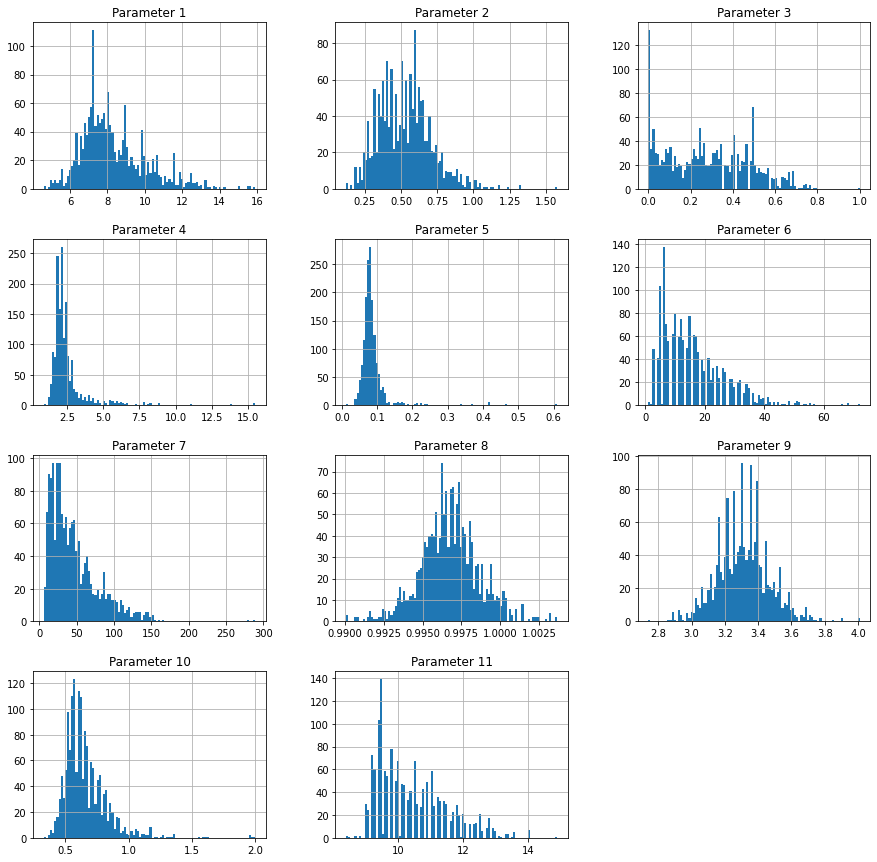

In [10]:
data[cols].hist(stacked=False, bins=100, figsize=(15,15));

> It can be seen from the above histogram plots that except the Parameter 8 and Parameter 9, most of the Parameters are Right-Skewed.

<AxesSubplot:xlabel='Signal_Strength'>

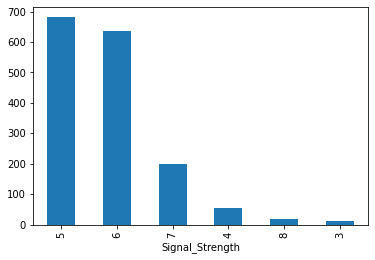

In [11]:
# let's plot the signal_strength column
data.value_counts(data["Signal_Strength"]).plot(kind="bar")

> From the above plot, we can see that signal_strength 5 is the dominant one.

#### Univariate Analysis

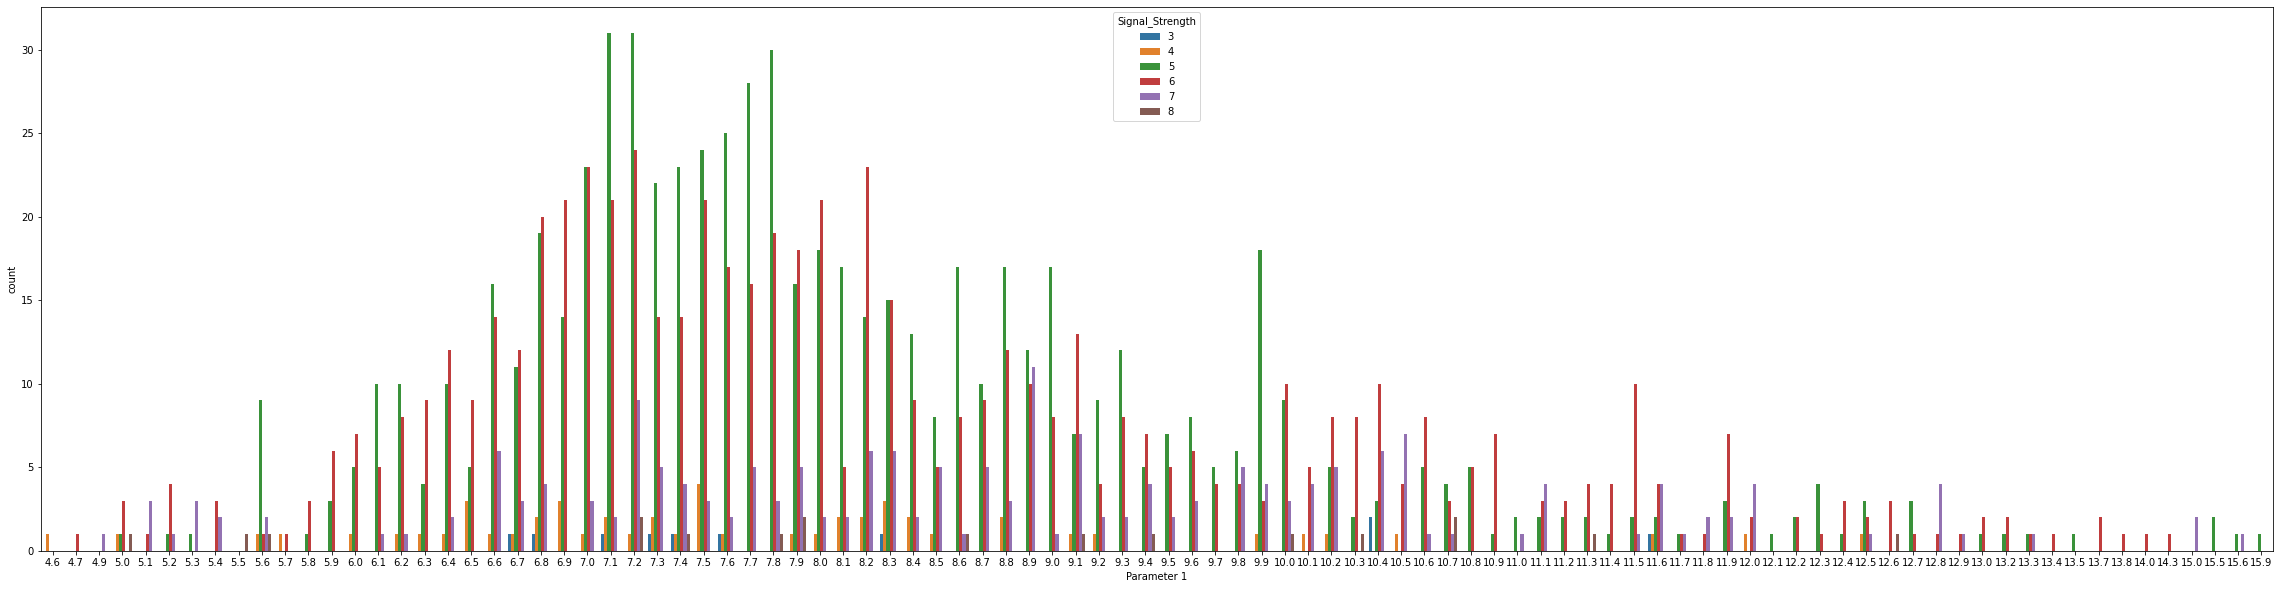

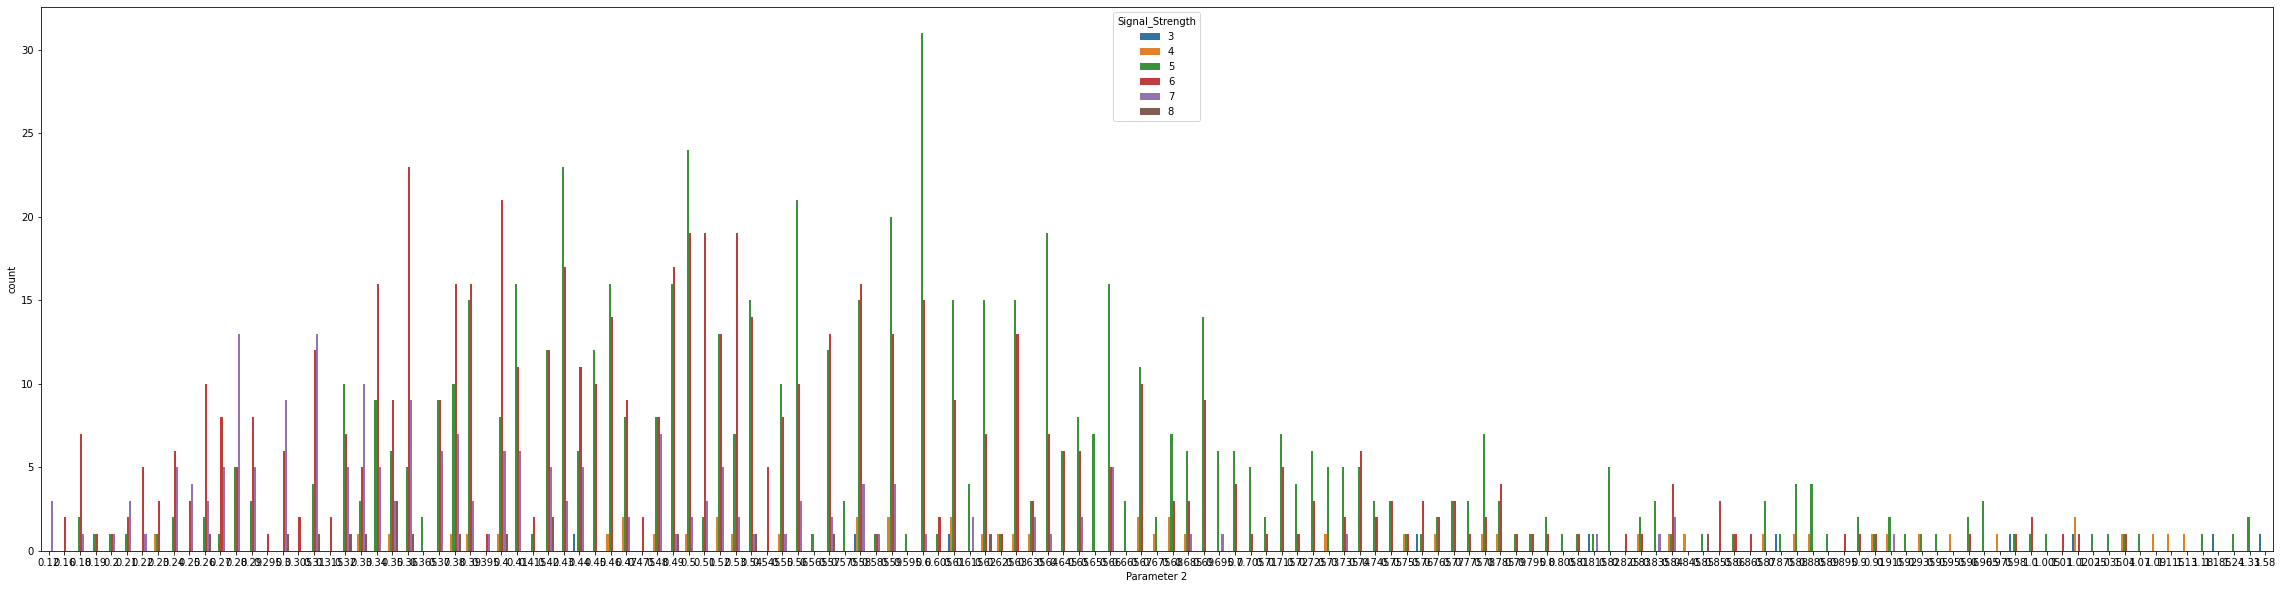

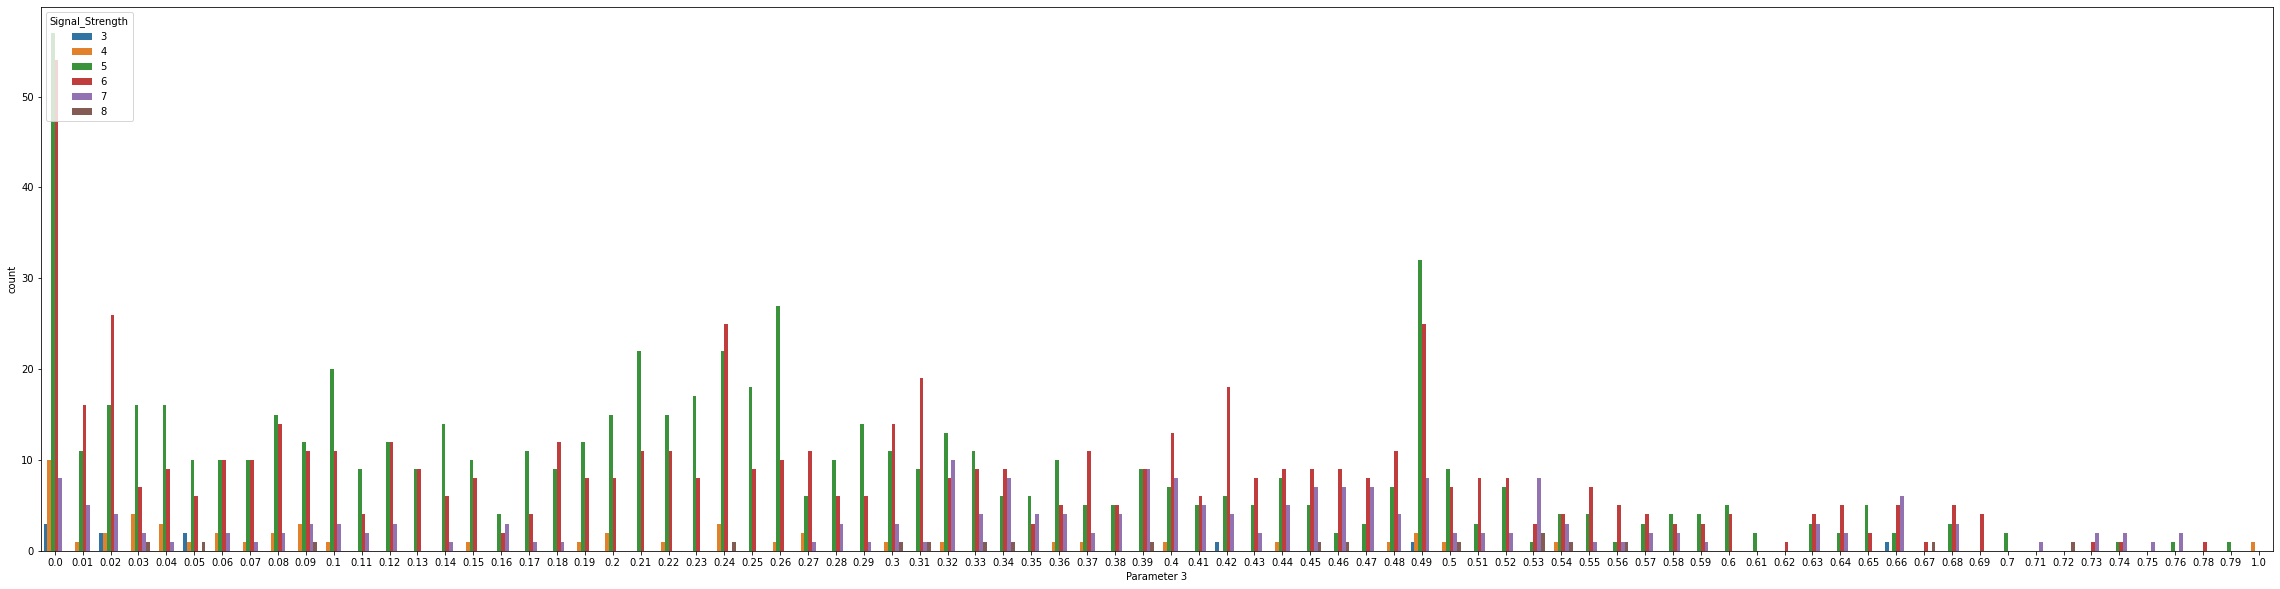

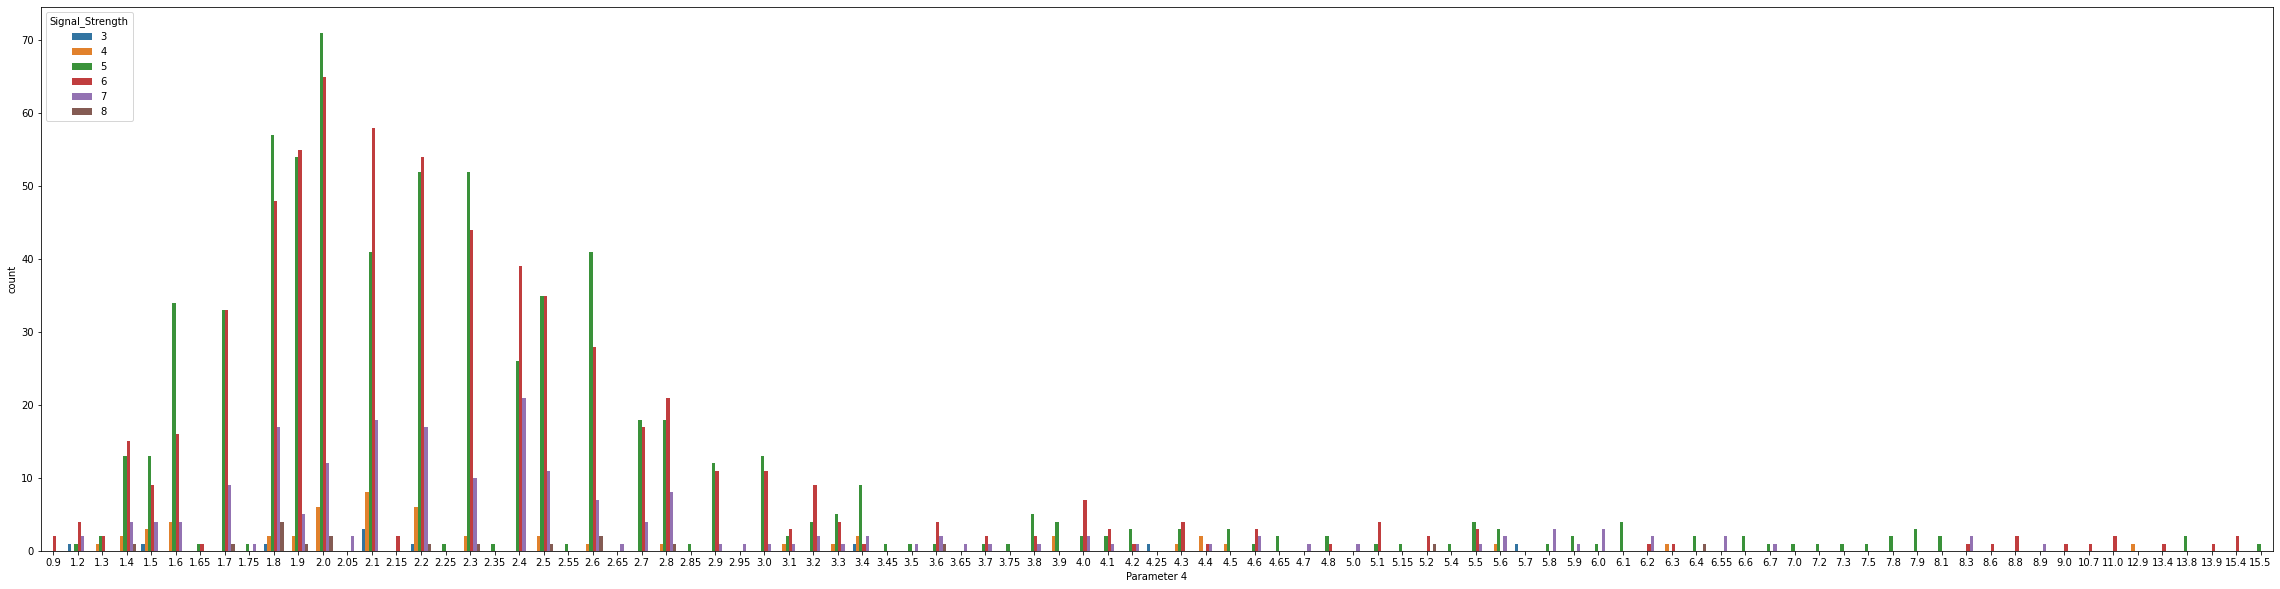

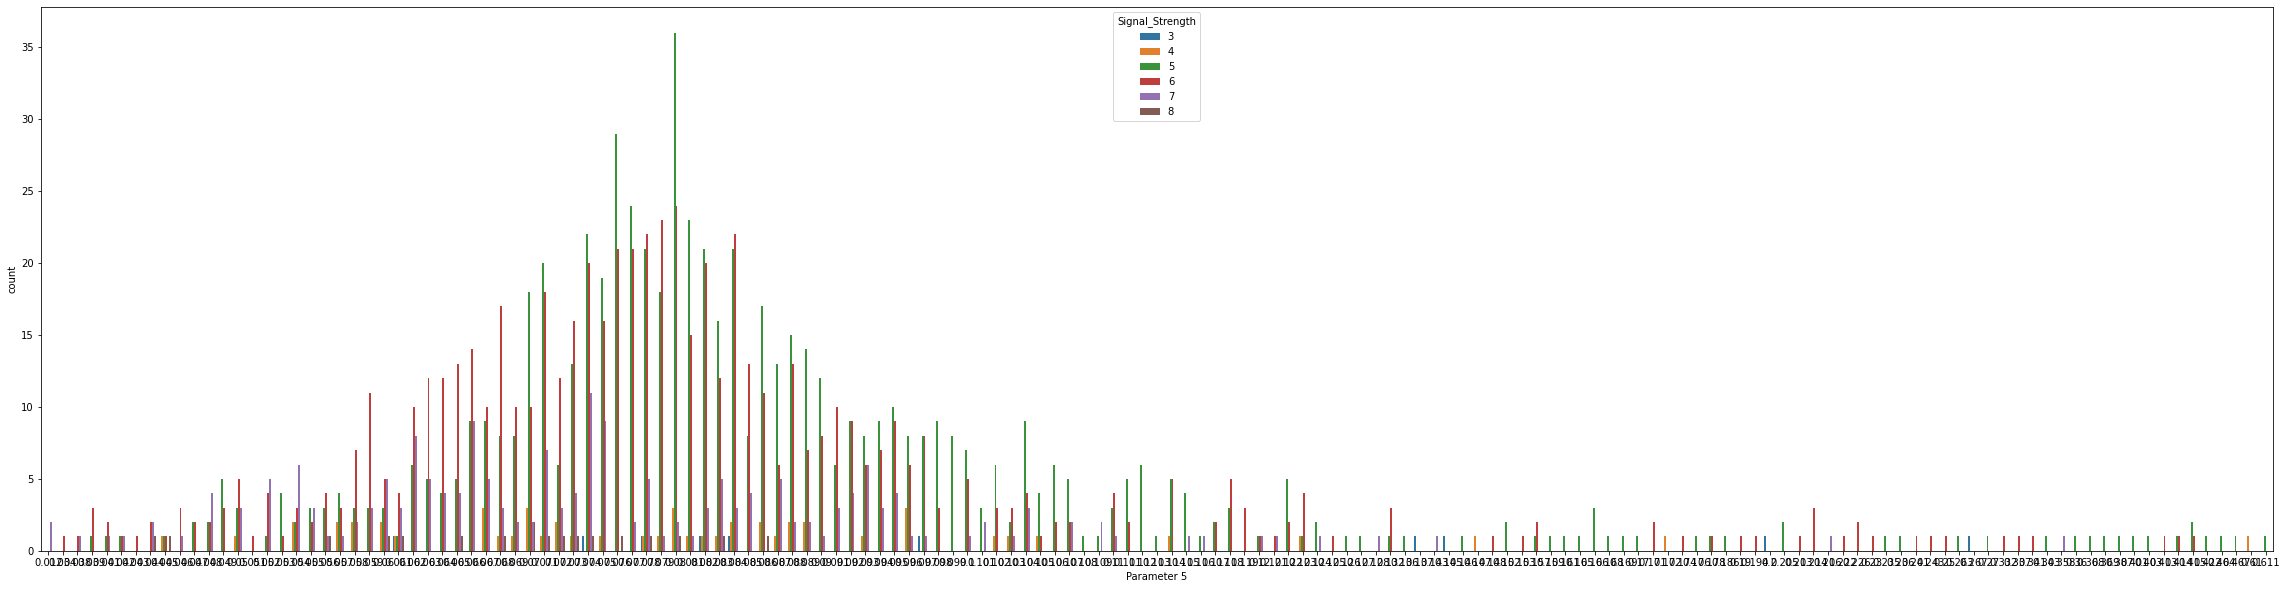

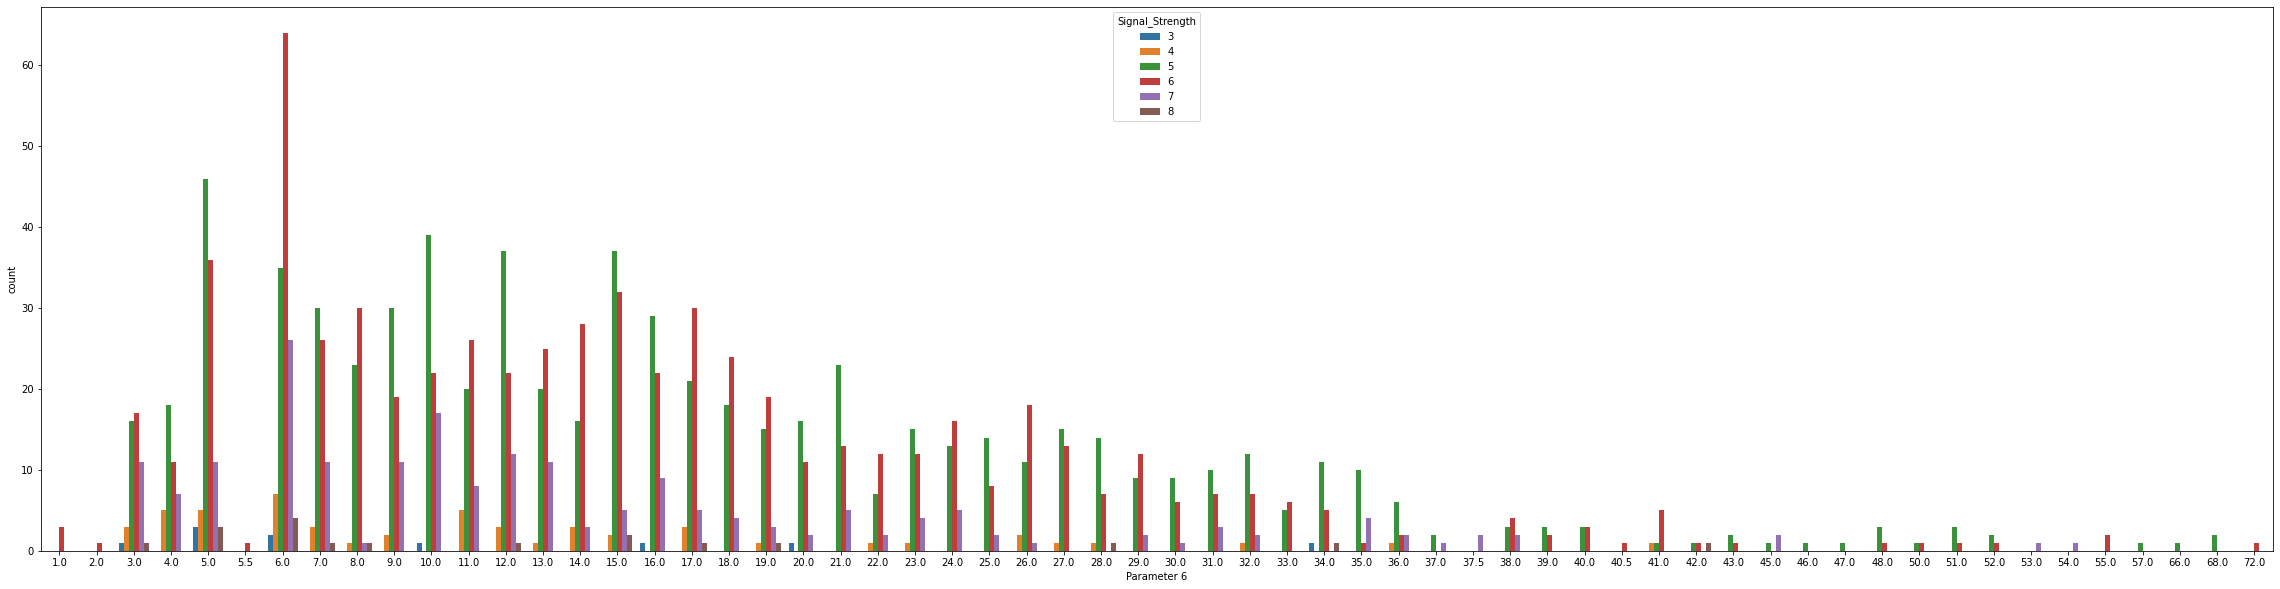

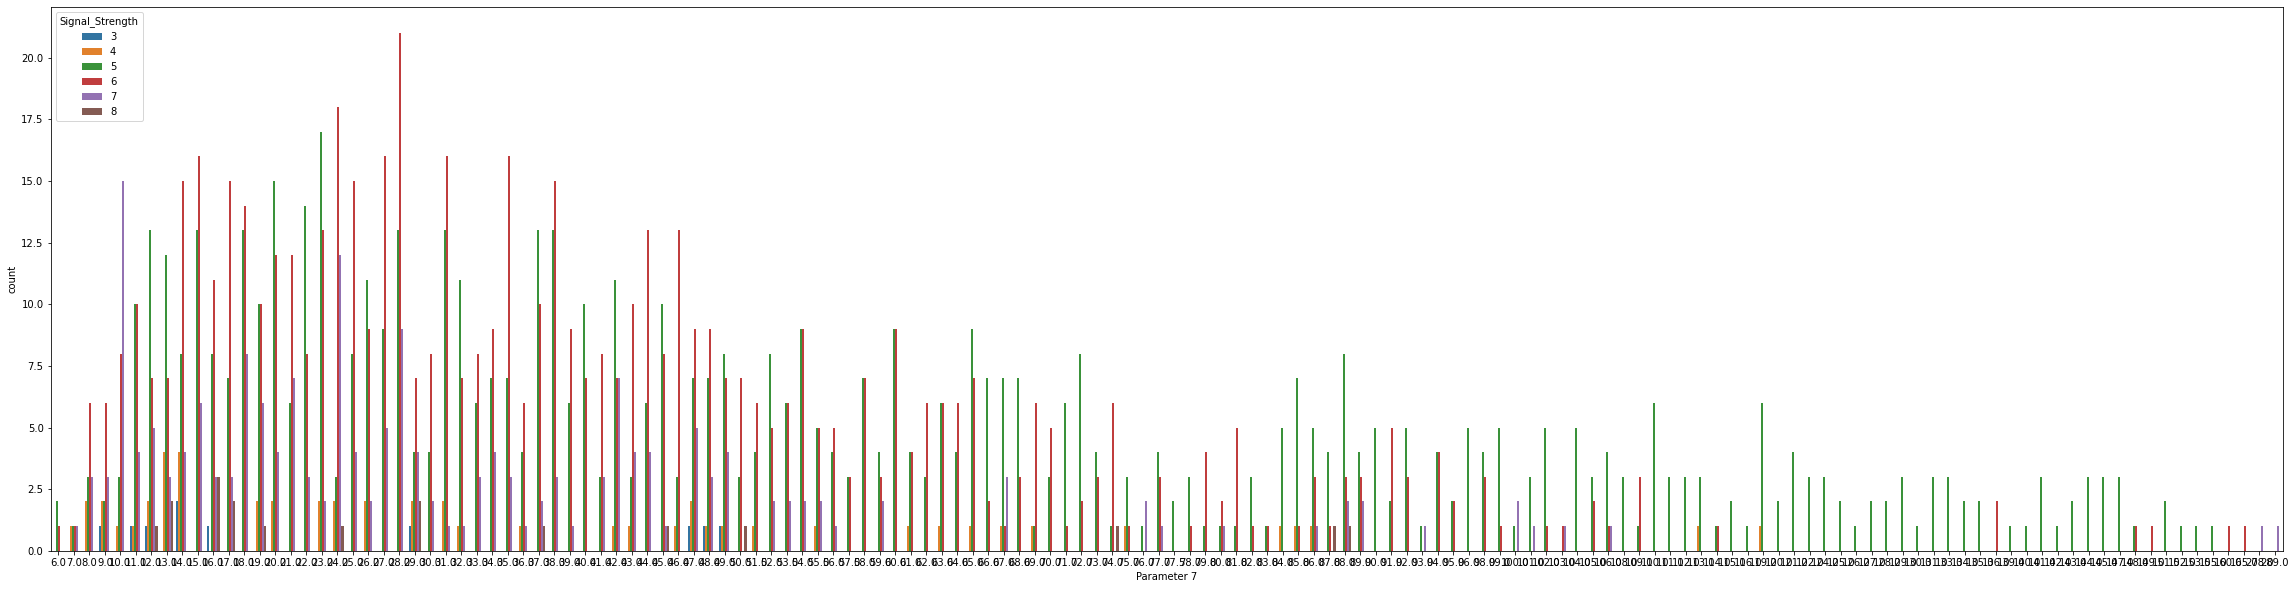

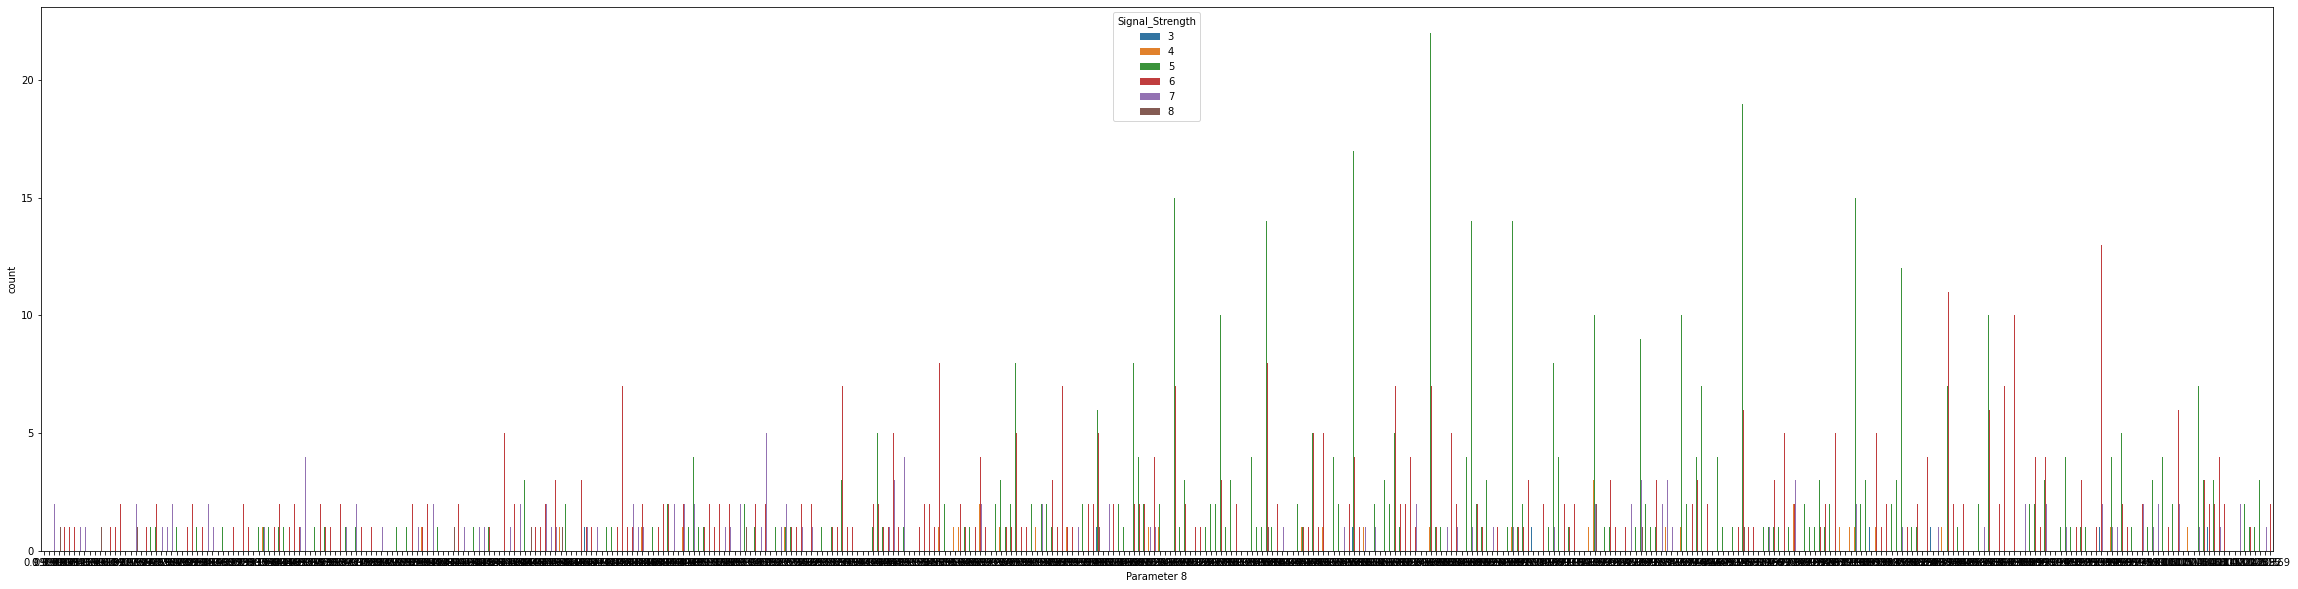

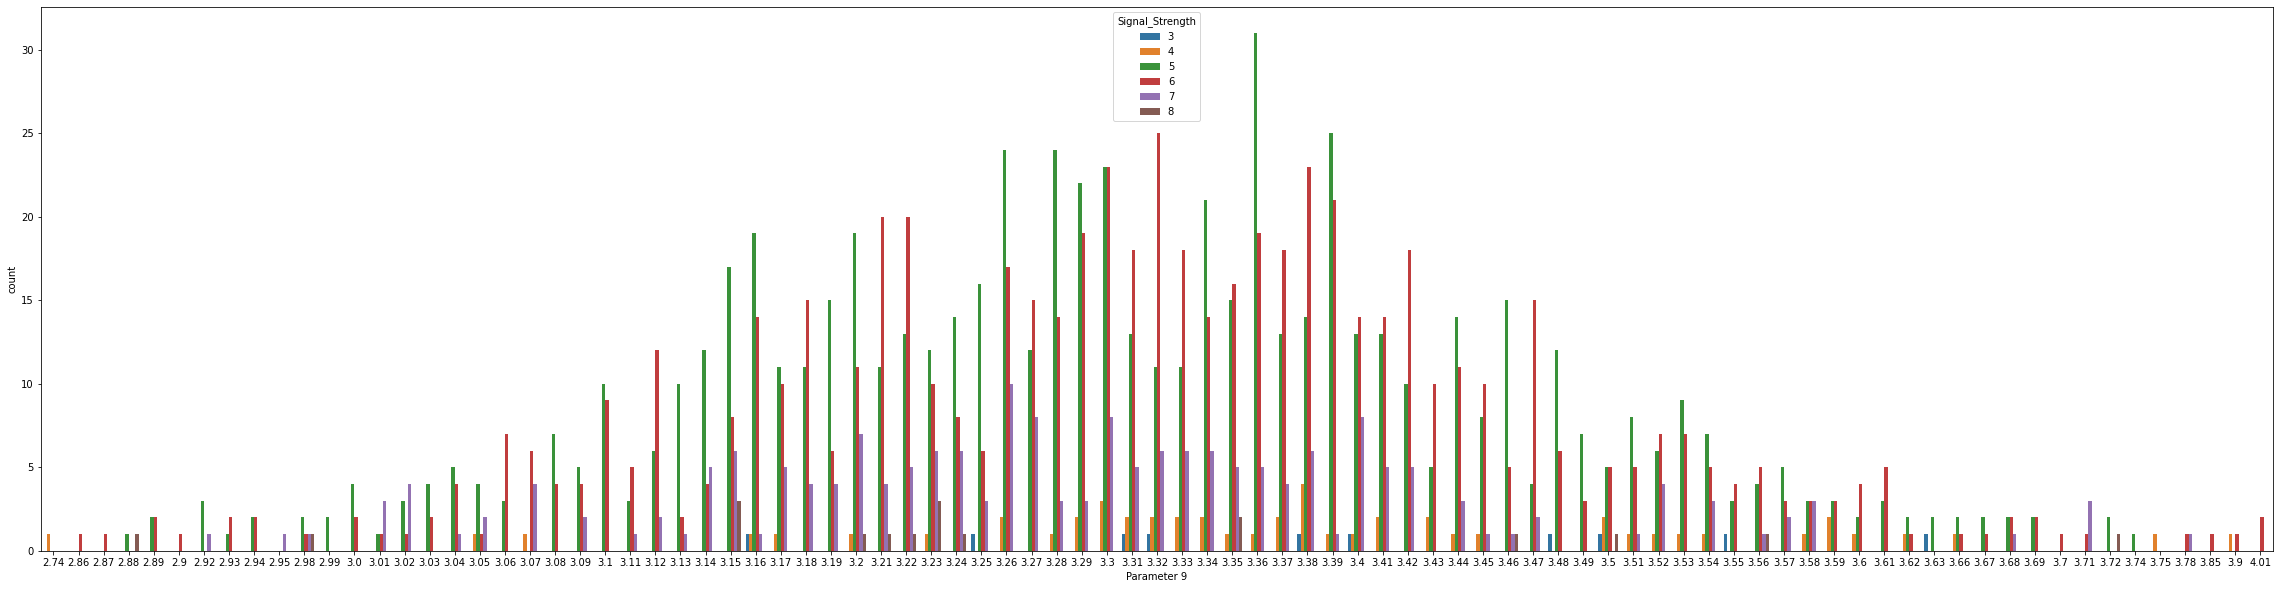

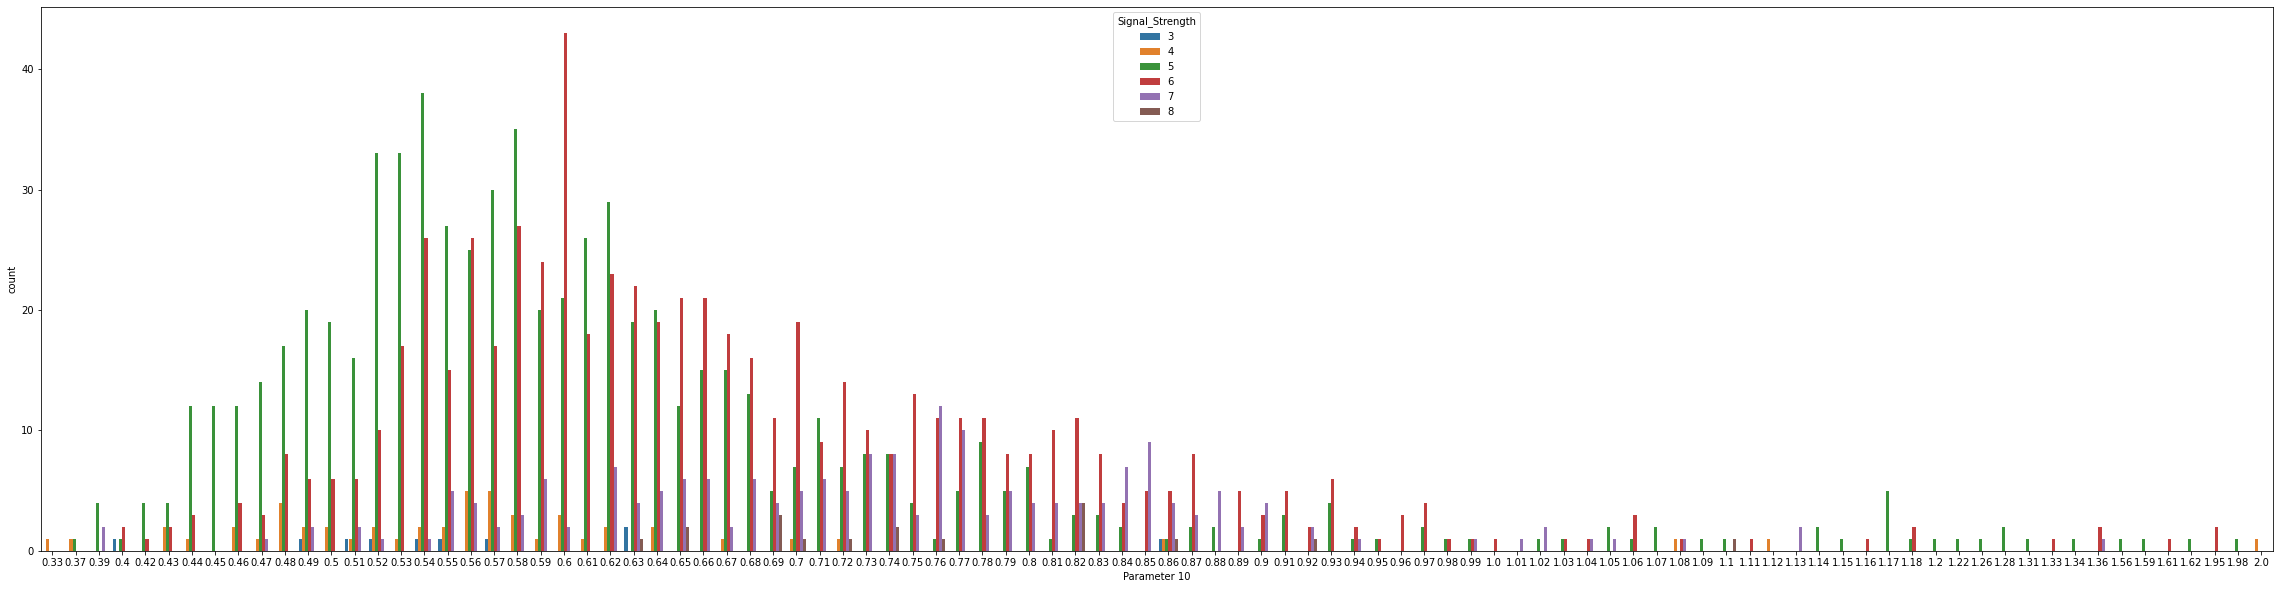

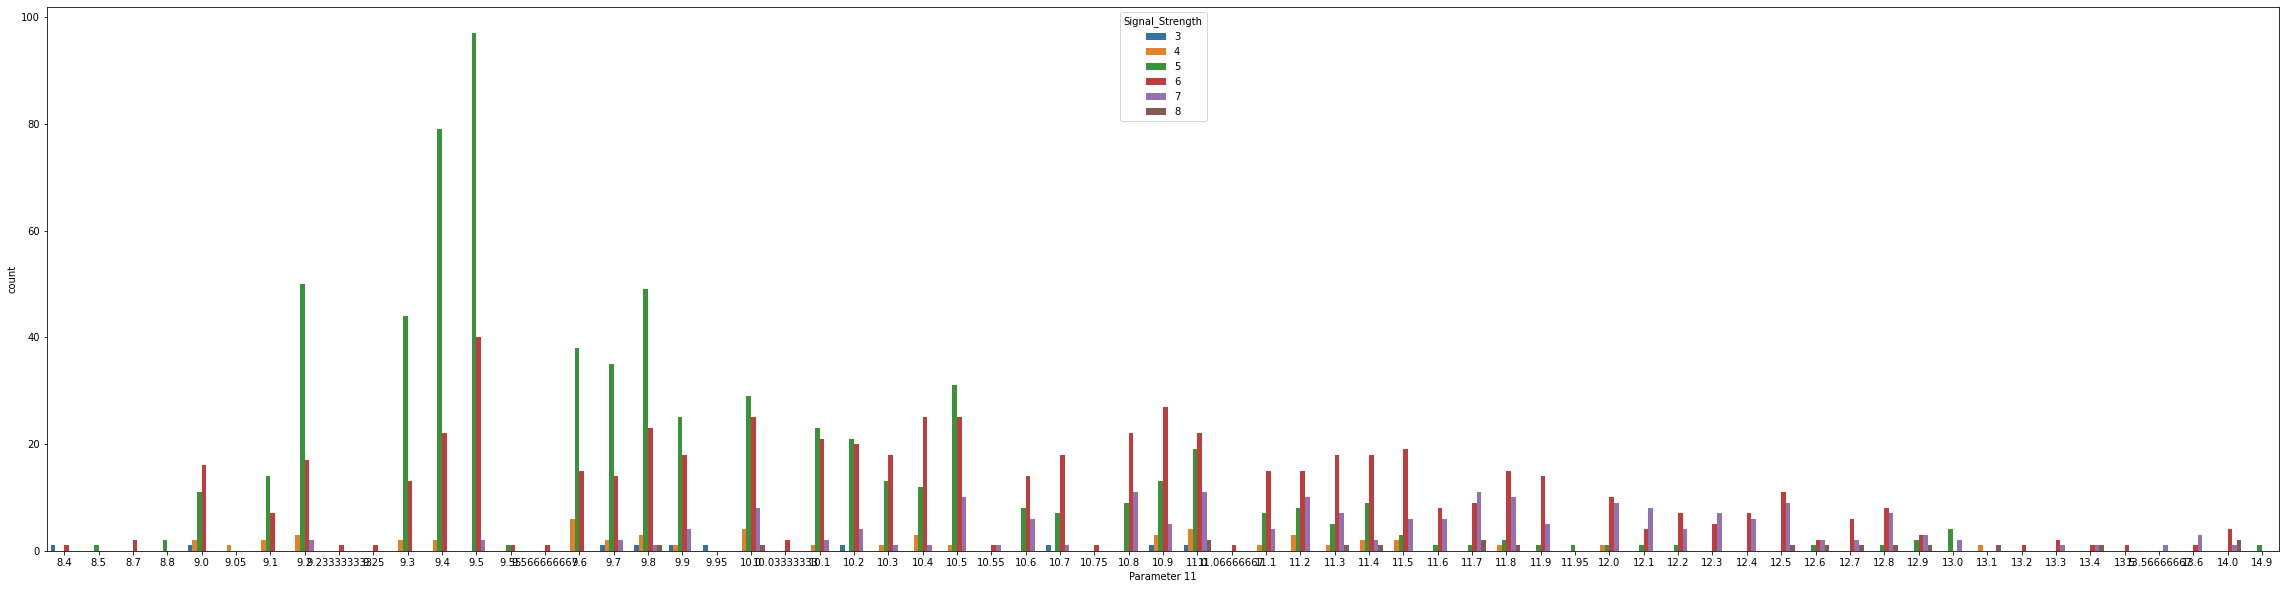

In [12]:
for i in range(1,12):
    plt.figure(figsize=(40,10))
    sns.countplot(x="Parameter "+str(i), hue="Signal_Strength", data=data)

> All the above count plots clearly shows that for most of the parameters "Signal Strength 5" is dominant

#### Bi-Variate Analysis

In [13]:
# look at the correlation 
data.corr()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
Parameter 1,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
Parameter 2,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
Parameter 3,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
Parameter 4,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
Parameter 5,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
Parameter 6,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
Parameter 7,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
Parameter 8,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
Parameter 9,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
Parameter 10,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


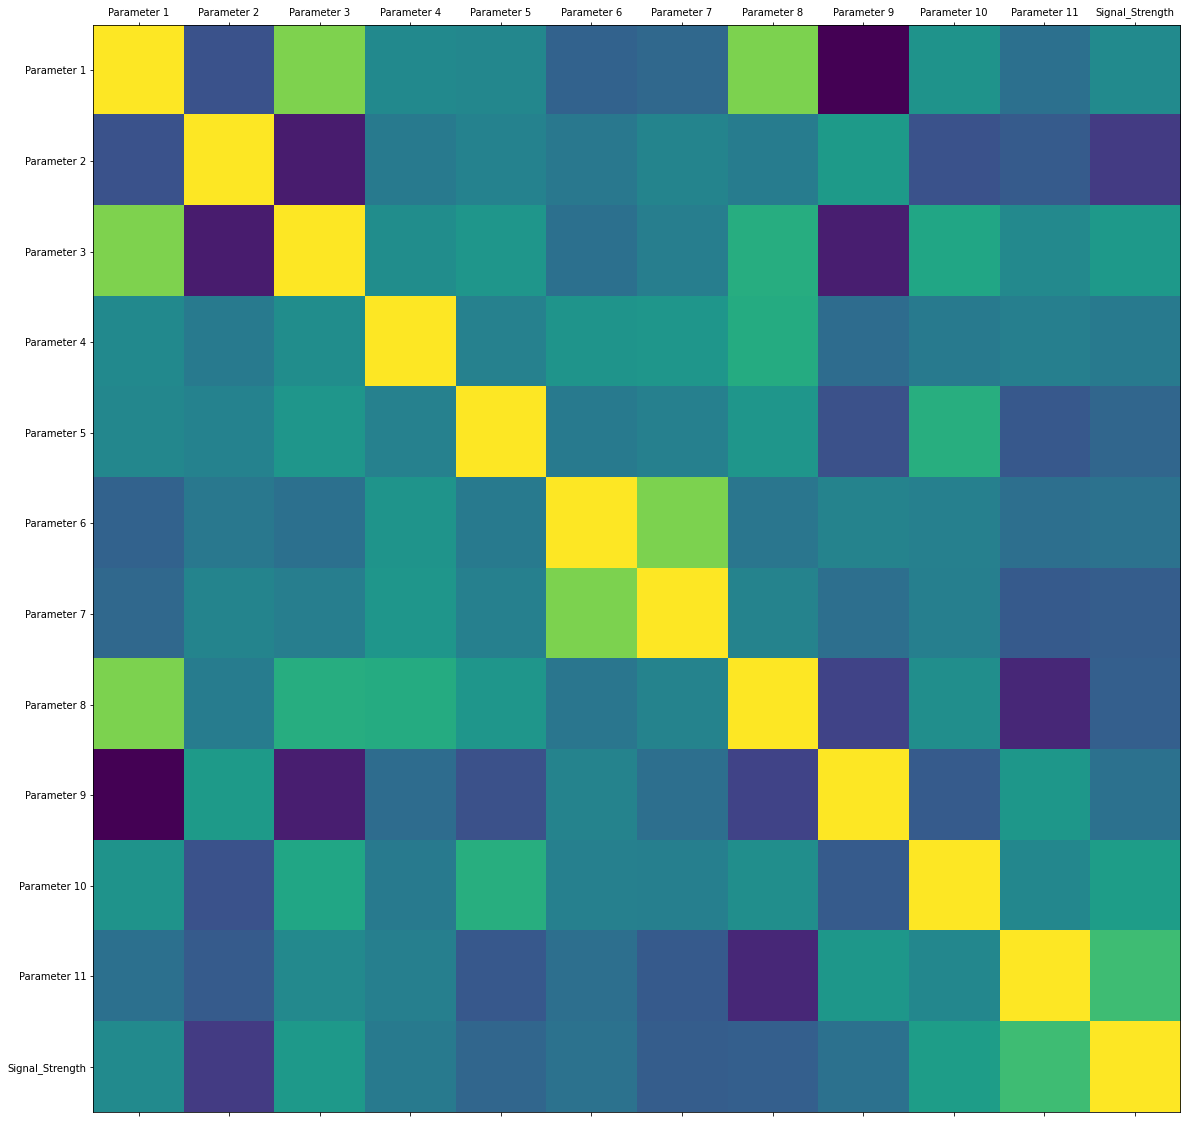

In [14]:
# let's plot heat map

def plot_corr(data, size=20):
    corr = data.corr()
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    
plot_corr(data)

#### Multi-Variate Analysis

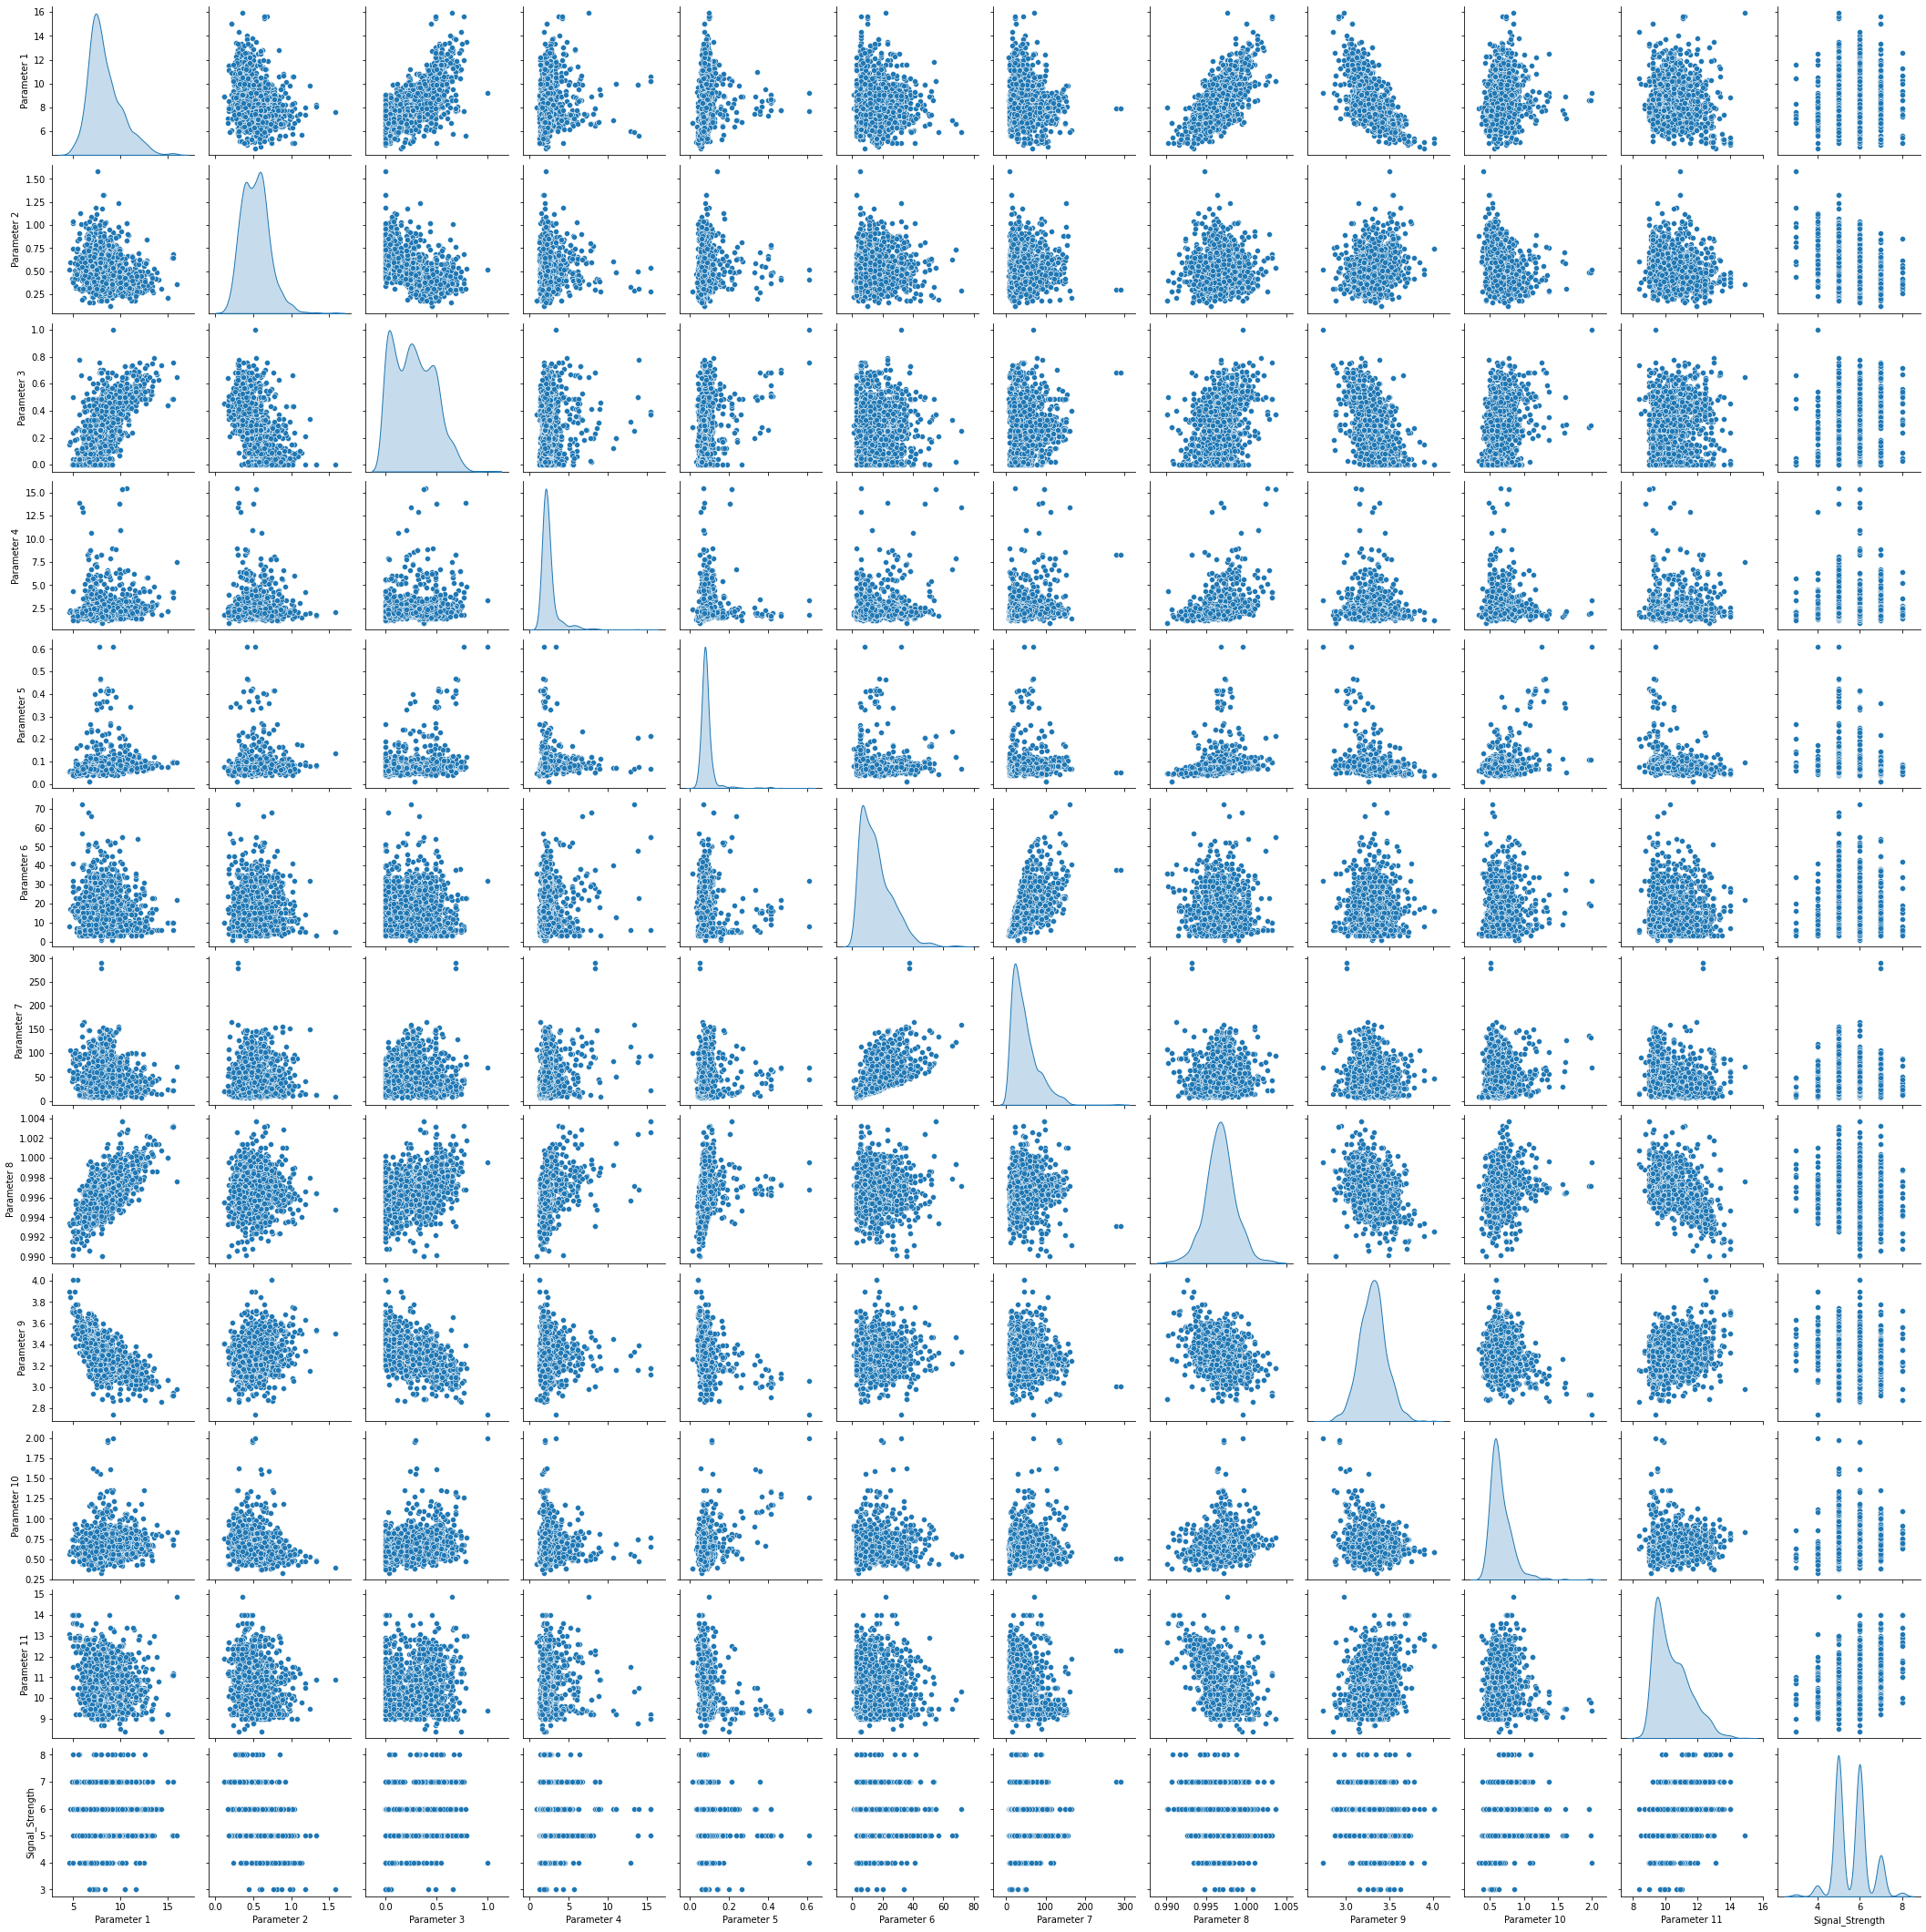

In [15]:
sns.pairplot(data, diag_kind='kde')

## 3. Design, train, tune and test a neural network regressor.

In [16]:
# Features.. Independent and dependent(target) variable

# Independent Variables
X = data.drop('Signal_Strength', axis=1)

# Target Variable
y = data['Signal_Strength']

In [17]:
# let's look at independent variables
X

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [18]:
X.shape

(1599, 11)

In [19]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: Signal_Strength, Length: 1599, dtype: int64

In [20]:
y.shape

(1599,)

[0.07614261 0.09580249 0.08016029 0.07970092 0.07610552 0.07522325
 0.10291614 0.08718607 0.07540862 0.10550493 0.14584915]


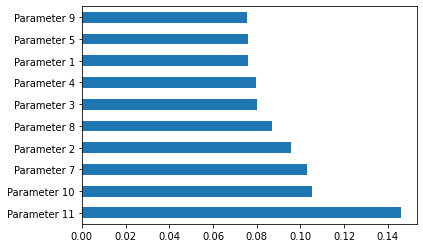

In [21]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

#using inbuilt class "feature_importances" of tree based classifiers
print(model.feature_importances_) 

#plotting graph of feature importances
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

> From the about plot, we can see that Parameter 11 is dominant

In [22]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into the Training and Testing set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [23]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [24]:
 # Forward propogation

from keras.models import Sequential
from keras.layers import Dense, Activation, LeakyReLU
from keras import optimizers

In [25]:
# Initialise the model
NN_model_Regressor = Sequential()

# The Input Layer :
NN_model_Regressor.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model_Regressor.add(Dense(64, kernel_initializer='normal',activation='relu'))  # sigmoid, tanh

NN_model_Regressor.add(Dense(32, kernel_initializer='normal'))
NN_model_Regressor.add(LeakyReLU(alpha=0.1))

NN_model_Regressor.add(Dense(16, kernel_initializer='normal'))
NN_model_Regressor.add(LeakyReLU(alpha=0.1))


# The Output Layer :
NN_model_Regressor.add(Dense(1, kernel_initializer='normal'))  # except softmax
NN_model_Regressor.add(LeakyReLU(alpha=0.1))

# Compile the network :
NN_model_Regressor.compile(loss='mean_absolute_error', optimizer='adam', metrics=['acc'])
NN_model_Regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 16)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 1

> Trainable parameters are equivalent to Total Parameters.. Hence there are no non-trainable parameters

In [26]:
# Fit the model

EPOCH=400
Network_Regressor=NN_model_Regressor.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=EPOCH, batch_size=200)

Epoch 1/400
7/7 [==============================] - 2s 34ms/step - loss: 5.6403 - acc: 0.0000e+00 - val_loss: 5.5758 - val_acc: 0.0000e+00
Epoch 2/400
7/7 [==============================] - 0s 9ms/step - loss: 5.6160 - acc: 0.0000e+00 - val_loss: 5.5360 - val_acc: 0.0000e+00
Epoch 3/400
7/7 [==============================] - 0s 7ms/step - loss: 5.5557 - acc: 0.0000e+00 - val_loss: 5.4314 - val_acc: 0.0000e+00
Epoch 4/400
7/7 [==============================] - 0s 8ms/step - loss: 5.3943 - acc: 0.0000e+00 - val_loss: 5.1564 - val_acc: 0.0000e+00
Epoch 5/400
7/7 [==============================] - 0s 9ms/step - loss: 4.9836 - acc: 0.0000e+00 - val_loss: 4.4758 - val_acc: 0.0000e+00
Epoch 6/400
7/7 [==============================] - 0s 10ms/step - loss: 4.0055 - acc: 0.0000e+00 - val_loss: 2.9500 - val_acc: 0.0000e+00
Epoch 7/400
7/7 [==============================] - 0s 10ms/step - loss: 2.2422 - acc: 0.0000e+00 - val_loss: 1.4664 - val_acc: 0.0000e+00
Epoch 8/400
7/7 [=====================

7/7 [==============================] - 0s 8ms/step - loss: 0.4586 - acc: 0.0000e+00 - val_loss: 0.4775 - val_acc: 0.0000e+00
Epoch 120/400
7/7 [==============================] - 0s 8ms/step - loss: 0.4546 - acc: 0.0000e+00 - val_loss: 0.4804 - val_acc: 0.0000e+00
Epoch 121/400
7/7 [==============================] - 0s 8ms/step - loss: 0.4593 - acc: 0.0000e+00 - val_loss: 0.4804 - val_acc: 0.0000e+00
Epoch 122/400
7/7 [==============================] - 0s 8ms/step - loss: 0.4670 - acc: 0.0000e+00 - val_loss: 0.4693 - val_acc: 0.0000e+00
Epoch 123/400
7/7 [==============================] - 0s 7ms/step - loss: 0.4529 - acc: 0.0000e+00 - val_loss: 0.4827 - val_acc: 0.0000e+00
Epoch 124/400
7/7 [==============================] - 0s 7ms/step - loss: 0.4531 - acc: 0.0000e+00 - val_loss: 0.4754 - val_acc: 0.0000e+00
Epoch 125/400
7/7 [==============================] - 0s 7ms/step - loss: 0.4568 - acc: 0.0000e+00 - val_loss: 0.5166 - val_acc: 0.0000e+00
Epoch 126/400
7/7 [======================

7/7 [==============================] - 0s 8ms/step - loss: 0.4264 - acc: 0.0000e+00 - val_loss: 0.4624 - val_acc: 0.0000e+00
Epoch 179/400
7/7 [==============================] - 0s 8ms/step - loss: 0.4225 - acc: 0.0000e+00 - val_loss: 0.4701 - val_acc: 0.0000e+00
Epoch 180/400
7/7 [==============================] - 0s 9ms/step - loss: 0.4240 - acc: 0.0000e+00 - val_loss: 0.4604 - val_acc: 0.0000e+00
Epoch 181/400
7/7 [==============================] - 0s 7ms/step - loss: 0.4263 - acc: 0.0000e+00 - val_loss: 0.4705 - val_acc: 0.0000e+00
Epoch 182/400
7/7 [==============================] - 0s 8ms/step - loss: 0.4291 - acc: 0.0000e+00 - val_loss: 0.4582 - val_acc: 0.0000e+00
Epoch 183/400
7/7 [==============================] - 0s 8ms/step - loss: 0.4297 - acc: 0.0000e+00 - val_loss: 0.4656 - val_acc: 0.0000e+00
Epoch 184/400
7/7 [==============================] - 0s 7ms/step - loss: 0.4220 - acc: 0.0000e+00 - val_loss: 0.4809 - val_acc: 0.0000e+00
Epoch 185/400
7/7 [======================

Epoch 237/400
7/7 [==============================] - 0s 8ms/step - loss: 0.4013 - acc: 0.0000e+00 - val_loss: 0.4711 - val_acc: 0.0000e+00
Epoch 238/400
7/7 [==============================] - 0s 7ms/step - loss: 0.4004 - acc: 0.0000e+00 - val_loss: 0.4575 - val_acc: 0.0000e+00
Epoch 239/400
7/7 [==============================] - 0s 7ms/step - loss: 0.3946 - acc: 0.0000e+00 - val_loss: 0.4686 - val_acc: 0.0000e+00
Epoch 240/400
7/7 [==============================] - 0s 7ms/step - loss: 0.3985 - acc: 0.0000e+00 - val_loss: 0.4631 - val_acc: 0.0000e+00
Epoch 241/400
7/7 [==============================] - 0s 7ms/step - loss: 0.4017 - acc: 0.0000e+00 - val_loss: 0.4561 - val_acc: 0.0000e+00
Epoch 242/400
7/7 [==============================] - 0s 9ms/step - loss: 0.4120 - acc: 0.0000e+00 - val_loss: 0.4596 - val_acc: 0.0000e+00
Epoch 243/400
7/7 [==============================] - 0s 7ms/step - loss: 0.4038 - acc: 0.0000e+00 - val_loss: 0.4654 - val_acc: 0.0000e+00
Epoch 244/400
7/7 [========

Epoch 296/400
7/7 [==============================] - 0s 8ms/step - loss: 0.3869 - acc: 0.0000e+00 - val_loss: 0.4704 - val_acc: 0.0000e+00
Epoch 297/400
7/7 [==============================] - 0s 7ms/step - loss: 0.3863 - acc: 0.0000e+00 - val_loss: 0.4633 - val_acc: 0.0000e+00
Epoch 298/400
7/7 [==============================] - 0s 7ms/step - loss: 0.3979 - acc: 0.0000e+00 - val_loss: 0.4961 - val_acc: 0.0000e+00
Epoch 299/400
7/7 [==============================] - 0s 8ms/step - loss: 0.3830 - acc: 0.0000e+00 - val_loss: 0.4714 - val_acc: 0.0000e+00
Epoch 300/400
7/7 [==============================] - 0s 8ms/step - loss: 0.3849 - acc: 0.0000e+00 - val_loss: 0.4602 - val_acc: 0.0000e+00
Epoch 301/400
7/7 [==============================] - 0s 9ms/step - loss: 0.3733 - acc: 0.0000e+00 - val_loss: 0.4638 - val_acc: 0.0000e+00
Epoch 302/400
7/7 [==============================] - 0s 8ms/step - loss: 0.3834 - acc: 0.0000e+00 - val_loss: 0.4571 - val_acc: 0.0000e+00
Epoch 303/400
7/7 [========

Epoch 355/400
7/7 [==============================] - 0s 8ms/step - loss: 0.3509 - acc: 0.0000e+00 - val_loss: 0.4835 - val_acc: 0.0000e+00
Epoch 356/400
7/7 [==============================] - 0s 10ms/step - loss: 0.3527 - acc: 0.0000e+00 - val_loss: 0.4676 - val_acc: 0.0000e+00
Epoch 357/400
7/7 [==============================] - 0s 8ms/step - loss: 0.3545 - acc: 0.0000e+00 - val_loss: 0.4698 - val_acc: 0.0000e+00
Epoch 358/400
7/7 [==============================] - 0s 10ms/step - loss: 0.3531 - acc: 0.0000e+00 - val_loss: 0.4557 - val_acc: 0.0000e+00
Epoch 359/400
7/7 [==============================] - 0s 9ms/step - loss: 0.3467 - acc: 0.0000e+00 - val_loss: 0.4588 - val_acc: 0.0000e+00
Epoch 360/400
7/7 [==============================] - 0s 8ms/step - loss: 0.3475 - acc: 0.0000e+00 - val_loss: 0.4582 - val_acc: 0.0000e+00
Epoch 361/400
7/7 [==============================] - 0s 8ms/step - loss: 0.3485 - acc: 0.0000e+00 - val_loss: 0.4636 - val_acc: 0.0000e+00
Epoch 362/400
7/7 [======

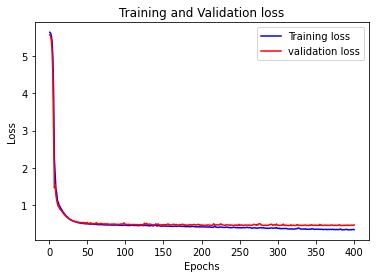

In [27]:
loss_train = Network_Regressor.history['loss']
loss_val = Network_Regressor.history['val_loss']
epochs = range(1,EPOCH+1)
plt.plot(epochs, loss_train, 'b', label='Training loss')
plt.plot(epochs, loss_val, 'r', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

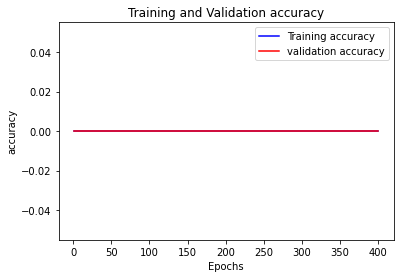

In [28]:
Acc_train = Network_Regressor.history['acc']
Acc_val = Network_Regressor.history['val_acc']
epochs = range(1,EPOCH+1)
plt.plot(epochs, Acc_train, 'b', label='Training accuracy')
plt.plot(epochs, Acc_val, 'r', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

## 4. Pickle the model for future use.

In [31]:
from keras.models import model_from_json
import numpy
import os

# Pickle model to JSON
Regressor_model_json = NN_model_Regressor.to_json()
with open("Regressor_model.json", "w") as json_file:
    json_file.write(Regressor_model_json)
# Pickle weights to HDF5
NN_model_Regressor.save_weights("Regressor_model.h5")
print("Saved model to disk")


# load json and create model
json_file = open('Regressor_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("Regressor_model.h5")
print("Loaded model from disk")

# Evaluate
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(X_test,y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Saved model to disk
Loaded model from disk
accuracy: 0.00%


# PART TWO

**DOMAIN**: Autonomous Vehicles

• **BUSINESS CONTEXT**: A Recognising multi-digit numbers in photographs captured at street level is an important component of modern-day map making. A classic example of a corpus of such street-level photographs is Google’s Street View imagery composed of hundreds of millions of geo-located 360-degree panoramic images.

The ability to automatically transcribe an address number from a geo-located patch of pixels and associate the transcribed number with a known street address helps pinpoint, with a high degree of accuracy, the location of the building it represents. More broadly, recognising numbers in photographs is a problem of interest to the optical character recognition community.

While OCR on constrained domains like document processing is well studied, arbitrary multi-character text recognition in photographs is still highly challenging. This difficulty arises due to the wide variability in the visual appearance of text in the wild on account of a large range of fonts, colours, styles, orientations, and character arrangements.

The recognition problem is further complicated by environmental factors such as lighting, shadows, specularity, and occlusions as well as by image acquisition factors such as resolution, motion, and focus blurs. In this project, we will use the dataset with images centred around a single digit (many of the images do contain some distractors at the sides). Although we are taking a sample of the data which is simpler, it is more complex than MNIST because of the distractors.

• **DATA DESCRIPTION**: The SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with the minimal requirement on data formatting but comes from a significantly harder, unsolved, real-world problem (recognising digits and numbers in natural scene images). SVHN is obtained from house numbers in Google Street View images.

Where the labels for each of this image are the prominent number in that image i.e. 2,6,7 and 4 respectively.The dataset has been provided in the form of h5py files.

• **PROJECT OBJECTIVE**: We will build a digit classifier on the SVHN (Street View Housing Number) dataset.

**Steps and tasks**:

1. Import the data.
2. Data pre-processing and visualisation.
3. Design, train, tune and test a neural network image classifier.

> **Hint**: Use best approach to refine and tune the data or the model. Be highly experimental here to get the best accuracy out of the model.

4. Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot and write your
observations on the same.

## 1. Import the data

In [32]:
# import the libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import h5py
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras import optimizers


import tensorflow
tensorflow.__version__

'2.9.1'

In [33]:
from zipfile import ZipFile
    
with ZipFile('Part - 4 - Autonomous_Vehicles_SVHN_single_grey1.zip', 'r') as z:
    z.extractall()

In [34]:
auto_veh = h5py.File("Part - 4 - Autonomous_Vehicles_SVHN_single_grey1.h5",'r')
auto_veh.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

## 2. Data Pre-processing and visualisation & 

In [35]:
X_train = auto_veh['X_train'][:]
y_train = auto_veh['y_train'][:]

X_val = auto_veh['X_val'][:]
y_val = auto_veh['y_val'][:]

X_test = auto_veh['X_test'][:]
y_test = auto_veh['y_test'][:]

In [36]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(42000, 32, 32)
(42000,)
(60000, 32, 32)
(60000,)
(18000, 32, 32)
(18000,)


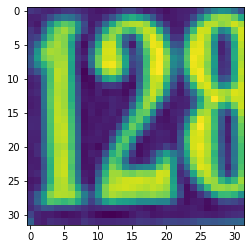

Label:  2


In [37]:
plt.imshow(X_train[0])    # show first number in the dataset
plt.show()
print('Label: ', y_train[0])

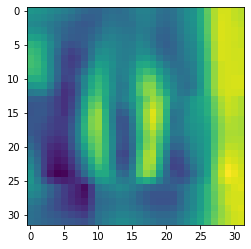

Label:  0


In [38]:
plt.imshow(X_train[100])
plt.show()
print('Label: ', y_train[100])

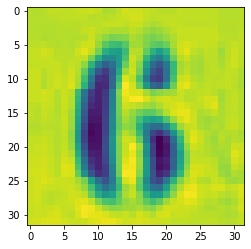

Label:  6


In [39]:
plt.imshow(X_train[1000])    # show first number in the dataset
plt.show()
print('Label: ', y_train[1000])

In [40]:
# reshaping X data: (n, 32, 32) => (n, 1024)
X_train = X_train.reshape((X_train.shape[0], -1))
X_val = X_val.reshape((X_val.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

In [41]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(42000, 1024)
(42000,)
(60000, 1024)
(60000,)
(18000, 1024)
(18000,)


In [42]:
print(X_train.max())
print(X_train.min())
maxVal=X_train.max()
X_train = X_train / maxVal
X_val = X_val / maxVal
X_test = X_test/maxVal
print(X_train.max())
print(X_train.min())

254.9745
0.0
1.0
0.0


In [43]:
print(y_train[10])
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes=10)
y_val = tensorflow.keras.utils.to_categorical(y_val, num_classes=10)
y_test= tensorflow.keras.utils.to_categorical(y_test, num_classes=10)
print(y_train[10])

1
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


label for each of the below image: 2
label for each of the below image: 6
label for each of the below image: 7
label for each of the below image: 4
label for each of the below image: 4
label for each of the below image: 0
label for each of the below image: 3
label for each of the below image: 0
label for each of the below image: 7
label for each of the below image: 3


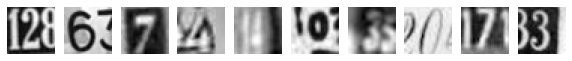

In [44]:
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i].reshape(32, 32), cmap="gray")
    plt.axis('off')
    print('label for each of the below image: %s' % (np.argmax(y_train[0:10][i])))
plt.show()

## 3. Design, train, tune and test a neural network image classifier.

In [45]:
# Instantiate the model
model = Sequential()

In [46]:
# add input, hidden and output layers to the model
model.add(Dense(500, input_shape = (1024, )))
model.add(Activation('sigmoid'))
model.add(Dense(500))
model.add(Activation('sigmoid'))
model.add(Dense(500))
model.add(Activation('sigmoid'))
model.add(Dense(500))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [47]:
sgd = optimizers.SGD(lr = 0.01)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [48]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 500)               512500    
                                                                 
 activation (Activation)     (None, 500)               0         
                                                                 
 dense_6 (Dense)             (None, 500)               250500    
                                                                 
 activation_1 (Activation)   (None, 500)               0         
                                                                 
 dense_7 (Dense)             (None, 500)               250500    
                                                                 
 activation_2 (Activation)   (None, 500)               0         
                                                                 
 dense_8 (Dense)             (None, 500)              

In [49]:
# Fitting the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size = 200, epochs = 100, verbose = 2)

Epoch 1/100
210/210 - 1s - loss: 2.3099 - accuracy: 0.1003 - val_loss: 2.3039 - val_accuracy: 0.1002 - 1s/epoch - 7ms/step
Epoch 2/100
210/210 - 1s - loss: 2.3041 - accuracy: 0.1002 - val_loss: 2.3055 - val_accuracy: 0.1016 - 1s/epoch - 5ms/step
Epoch 3/100
210/210 - 1s - loss: 2.3046 - accuracy: 0.1015 - val_loss: 2.3047 - val_accuracy: 0.1007 - 1s/epoch - 6ms/step
Epoch 4/100
210/210 - 1s - loss: 2.3045 - accuracy: 0.0999 - val_loss: 2.3036 - val_accuracy: 0.1002 - 997ms/epoch - 5ms/step
Epoch 5/100
210/210 - 2s - loss: 2.3042 - accuracy: 0.0983 - val_loss: 2.3050 - val_accuracy: 0.1016 - 2s/epoch - 8ms/step
Epoch 6/100
210/210 - 1s - loss: 2.3044 - accuracy: 0.0991 - val_loss: 2.3065 - val_accuracy: 0.1007 - 717ms/epoch - 3ms/step
Epoch 7/100
210/210 - 1s - loss: 2.3043 - accuracy: 0.0995 - val_loss: 2.3039 - val_accuracy: 0.1007 - 777ms/epoch - 4ms/step
Epoch 8/100
210/210 - 1s - loss: 2.3043 - accuracy: 0.1009 - val_loss: 2.3036 - val_accuracy: 0.1008 - 746ms/epoch - 4ms/step
Epoc

Epoch 66/100
210/210 - 1s - loss: 2.3045 - accuracy: 0.0977 - val_loss: 2.3053 - val_accuracy: 0.1002 - 914ms/epoch - 4ms/step
Epoch 67/100
210/210 - 1s - loss: 2.3045 - accuracy: 0.0975 - val_loss: 2.3059 - val_accuracy: 0.0955 - 958ms/epoch - 5ms/step
Epoch 68/100
210/210 - 1s - loss: 2.3043 - accuracy: 0.0996 - val_loss: 2.3037 - val_accuracy: 0.1012 - 887ms/epoch - 4ms/step
Epoch 69/100
210/210 - 1s - loss: 2.3044 - accuracy: 0.0989 - val_loss: 2.3039 - val_accuracy: 0.1002 - 960ms/epoch - 5ms/step
Epoch 70/100
210/210 - 1s - loss: 2.3046 - accuracy: 0.0986 - val_loss: 2.3035 - val_accuracy: 0.1002 - 995ms/epoch - 5ms/step
Epoch 71/100
210/210 - 1s - loss: 2.3044 - accuracy: 0.1001 - val_loss: 2.3045 - val_accuracy: 0.1002 - 944ms/epoch - 4ms/step
Epoch 72/100
210/210 - 1s - loss: 2.3039 - accuracy: 0.1003 - val_loss: 2.3047 - val_accuracy: 0.1002 - 794ms/epoch - 4ms/step
Epoch 73/100
210/210 - 1s - loss: 2.3043 - accuracy: 0.1007 - val_loss: 2.3043 - val_accuracy: 0.1008 - 803ms/e

In [50]:
results = model.evaluate(X_val, y_val)

1875/1875 [==============================] - 6s 3ms/step - loss: 2.3039 - accuracy: 0.1000


In [51]:
print('Validation accuracy: ', results[1])

Validation accuracy:  0.10000000149011612


In [52]:
results = model.evaluate(X_test, y_test)

563/563 [==============================] - 1s 3ms/step - loss: 2.3041 - accuracy: 0.1002


In [53]:
print('Test accuracy: ', results[1])

Test accuracy:  0.10016666352748871


In [54]:
# from now on, create a function to generate (return) models
def mlp_model():
    model = Sequential()
    
    model.add(Dense(500, input_shape = (1024, ), kernel_initializer='he_normal'))     # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(500, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(500, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(500, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(10, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [55]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=200, epochs = 100, verbose = 2)

Epoch 1/100
210/210 - 1s - loss: 2.3510 - accuracy: 0.1006 - val_loss: 2.3030 - val_accuracy: 0.1008 - 1s/epoch - 6ms/step
Epoch 2/100
210/210 - 1s - loss: 2.3029 - accuracy: 0.0998 - val_loss: 2.3027 - val_accuracy: 0.0983 - 761ms/epoch - 4ms/step
Epoch 3/100
210/210 - 1s - loss: 2.3028 - accuracy: 0.1005 - val_loss: 2.3028 - val_accuracy: 0.1048 - 668ms/epoch - 3ms/step
Epoch 4/100
210/210 - 1s - loss: 2.3028 - accuracy: 0.0988 - val_loss: 2.3029 - val_accuracy: 0.0954 - 847ms/epoch - 4ms/step
Epoch 5/100
210/210 - 1s - loss: 2.3028 - accuracy: 0.0990 - val_loss: 2.3029 - val_accuracy: 0.0958 - 882ms/epoch - 4ms/step
Epoch 6/100
210/210 - 1s - loss: 2.3029 - accuracy: 0.1005 - val_loss: 2.3027 - val_accuracy: 0.1010 - 816ms/epoch - 4ms/step
Epoch 7/100
210/210 - 1s - loss: 2.3028 - accuracy: 0.1005 - val_loss: 2.3029 - val_accuracy: 0.1009 - 772ms/epoch - 4ms/step
Epoch 8/100
210/210 - 1s - loss: 2.3028 - accuracy: 0.1001 - val_loss: 2.3028 - val_accuracy: 0.0955 - 799ms/epoch - 4ms/

Epoch 66/100
210/210 - 1s - loss: 2.3028 - accuracy: 0.0983 - val_loss: 2.3028 - val_accuracy: 0.0955 - 836ms/epoch - 4ms/step
Epoch 67/100
210/210 - 1s - loss: 2.3028 - accuracy: 0.0998 - val_loss: 2.3027 - val_accuracy: 0.0956 - 834ms/epoch - 4ms/step
Epoch 68/100
210/210 - 1s - loss: 2.3028 - accuracy: 0.0985 - val_loss: 2.3028 - val_accuracy: 0.0982 - 653ms/epoch - 3ms/step
Epoch 69/100
210/210 - 1s - loss: 2.3028 - accuracy: 0.0991 - val_loss: 2.3027 - val_accuracy: 0.0959 - 691ms/epoch - 3ms/step
Epoch 70/100
210/210 - 1s - loss: 2.3028 - accuracy: 0.0991 - val_loss: 2.3031 - val_accuracy: 0.0955 - 717ms/epoch - 3ms/step
Epoch 71/100
210/210 - 1s - loss: 2.3027 - accuracy: 0.1008 - val_loss: 2.3029 - val_accuracy: 0.0984 - 603ms/epoch - 3ms/step
Epoch 72/100
210/210 - 1s - loss: 2.3028 - accuracy: 0.0989 - val_loss: 2.3029 - val_accuracy: 0.0967 - 592ms/epoch - 3ms/step
Epoch 73/100
210/210 - 1s - loss: 2.3028 - accuracy: 0.0994 - val_loss: 2.3027 - val_accuracy: 0.1038 - 513ms/e

In [56]:
results = model.evaluate(X_val, y_val)

1875/1875 [==============================] - 3s 2ms/step - loss: 2.3027 - accuracy: 0.1000


In [57]:
print('Validation accuracy: ', results[1])

Validation accuracy:  0.10000000149011612


In [58]:
results = model.evaluate(X_test, y_test)

563/563 [==============================] - 1s 2ms/step - loss: 2.3028 - accuracy: 0.1008


In [59]:
print('Test accuracy: ', results[1])

Test accuracy:  0.1007777750492096


Sigmoid gave a very low accuracy due to:
* Its output is not zero centered. Hence, weight initialization is not straight forward
* Vanishing gradient problem
* slow convergence

In [60]:
# use relu activation function 
def mlp_model():
    model = Sequential()
    
    model.add(Dense(500, input_shape = (1024, )))
    model.add(Activation('relu'))    
    model.add(Dense(500))
    model.add(Activation('relu'))    
    model.add(Dense(500))
    model.add(Activation('relu'))    
    model.add(Dense(500))
    model.add(Activation('relu'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [61]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 100, verbose = 2)

Epoch 1/100
1313/1313 - 4s - loss: 2.3019 - accuracy: 0.1127 - val_loss: 2.2959 - val_accuracy: 0.1437 - 4s/epoch - 3ms/step
Epoch 2/100
1313/1313 - 4s - loss: 2.2931 - accuracy: 0.1482 - val_loss: 2.2893 - val_accuracy: 0.1694 - 4s/epoch - 3ms/step
Epoch 3/100
1313/1313 - 3s - loss: 2.2862 - accuracy: 0.1741 - val_loss: 2.2824 - val_accuracy: 0.1972 - 3s/epoch - 3ms/step
Epoch 4/100
1313/1313 - 3s - loss: 2.2791 - accuracy: 0.2032 - val_loss: 2.2749 - val_accuracy: 0.2271 - 3s/epoch - 2ms/step
Epoch 5/100
1313/1313 - 3s - loss: 2.2710 - accuracy: 0.2294 - val_loss: 2.2655 - val_accuracy: 0.2621 - 3s/epoch - 2ms/step
Epoch 6/100
1313/1313 - 3s - loss: 2.2604 - accuracy: 0.2491 - val_loss: 2.2553 - val_accuracy: 0.2276 - 3s/epoch - 2ms/step
Epoch 7/100
1313/1313 - 3s - loss: 2.2475 - accuracy: 0.2748 - val_loss: 2.2392 - val_accuracy: 0.2993 - 3s/epoch - 2ms/step
Epoch 8/100
1313/1313 - 3s - loss: 2.2302 - accuracy: 0.2984 - val_loss: 2.2190 - val_accuracy: 0.3224 - 3s/epoch - 2ms/step


1313/1313 - 4s - loss: 0.7247 - accuracy: 0.7800 - val_loss: 0.7789 - val_accuracy: 0.7669 - 4s/epoch - 3ms/step
Epoch 67/100
1313/1313 - 3s - loss: 0.7176 - accuracy: 0.7855 - val_loss: 0.7716 - val_accuracy: 0.7688 - 3s/epoch - 2ms/step
Epoch 68/100
1313/1313 - 3s - loss: 0.7110 - accuracy: 0.7847 - val_loss: 0.7728 - val_accuracy: 0.7677 - 3s/epoch - 2ms/step
Epoch 69/100
1313/1313 - 3s - loss: 0.7026 - accuracy: 0.7886 - val_loss: 0.7675 - val_accuracy: 0.7677 - 3s/epoch - 2ms/step
Epoch 70/100
1313/1313 - 3s - loss: 0.6984 - accuracy: 0.7895 - val_loss: 0.7971 - val_accuracy: 0.7623 - 3s/epoch - 2ms/step
Epoch 71/100
1313/1313 - 3s - loss: 0.6911 - accuracy: 0.7930 - val_loss: 0.7772 - val_accuracy: 0.7693 - 3s/epoch - 2ms/step
Epoch 72/100
1313/1313 - 3s - loss: 0.6845 - accuracy: 0.7925 - val_loss: 0.7485 - val_accuracy: 0.7785 - 3s/epoch - 2ms/step
Epoch 73/100
1313/1313 - 3s - loss: 0.6782 - accuracy: 0.7954 - val_loss: 0.7415 - val_accuracy: 0.7785 - 3s/epoch - 2ms/step
Epoch

In [62]:
results = model.evaluate(X_val, y_val)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.5842 - accuracy: 0.8270


In [63]:
print('Validation accuracy: ', results[1])

Validation accuracy:  0.8269833326339722


In [64]:
results = model.evaluate(X_test, y_test)

563/563 [==============================] - 1s 2ms/step - loss: 0.6713 - accuracy: 0.8053


In [65]:
print('Test accuracy: ', results[1])

Test accuracy:  0.8053333163261414


ReLU has significantly reduced the loss and thereby increased the accuracy

Now, Let's introduce Batch Normalization:

* Batch Normalization preents internal covariance shift problem
* highely effective

In [66]:
from tensorflow.keras.layers import BatchNormalization, Dropout

In [67]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(500, input_shape = (1024, )))
    model.add(BatchNormalization())                    
    model.add(Activation('relu'))    
    model.add(Dense(500))
    model.add(BatchNormalization())                    
    model.add(Activation('relu'))    
    model.add(Dense(500))
    model.add(BatchNormalization())                    
    model.add(Activation('relu'))    
    model.add(Dense(500))
    model.add(BatchNormalization())                    
    model.add(Activation('relu'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [68]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 100, verbose = 2)

Epoch 1/100
1313/1313 - 7s - loss: 2.1127 - accuracy: 0.2655 - val_loss: 1.7457 - val_accuracy: 0.4240 - 7s/epoch - 6ms/step
Epoch 2/100
1313/1313 - 6s - loss: 1.5867 - accuracy: 0.4821 - val_loss: 1.4038 - val_accuracy: 0.5564 - 6s/epoch - 5ms/step
Epoch 3/100
1313/1313 - 7s - loss: 1.3243 - accuracy: 0.5754 - val_loss: 1.1954 - val_accuracy: 0.6282 - 7s/epoch - 5ms/step
Epoch 4/100
1313/1313 - 7s - loss: 1.1757 - accuracy: 0.6270 - val_loss: 1.0942 - val_accuracy: 0.6551 - 7s/epoch - 5ms/step
Epoch 5/100
1313/1313 - 7s - loss: 1.0713 - accuracy: 0.6625 - val_loss: 1.0051 - val_accuracy: 0.6879 - 7s/epoch - 5ms/step
Epoch 6/100
1313/1313 - 7s - loss: 0.9956 - accuracy: 0.6854 - val_loss: 0.9382 - val_accuracy: 0.7091 - 7s/epoch - 5ms/step
Epoch 7/100
1313/1313 - 6s - loss: 0.9375 - accuracy: 0.7035 - val_loss: 0.9093 - val_accuracy: 0.7194 - 6s/epoch - 5ms/step
Epoch 8/100
1313/1313 - 6s - loss: 0.8877 - accuracy: 0.7191 - val_loss: 0.8881 - val_accuracy: 0.7195 - 6s/epoch - 5ms/step


1313/1313 - 6s - loss: 0.2708 - accuracy: 0.9155 - val_loss: 0.6683 - val_accuracy: 0.8063 - 6s/epoch - 5ms/step
Epoch 67/100
1313/1313 - 6s - loss: 0.2639 - accuracy: 0.9163 - val_loss: 0.6397 - val_accuracy: 0.8156 - 6s/epoch - 4ms/step
Epoch 68/100
1313/1313 - 6s - loss: 0.2592 - accuracy: 0.9194 - val_loss: 0.7161 - val_accuracy: 0.7924 - 6s/epoch - 5ms/step
Epoch 69/100
1313/1313 - 6s - loss: 0.2595 - accuracy: 0.9181 - val_loss: 0.6750 - val_accuracy: 0.8066 - 6s/epoch - 5ms/step
Epoch 70/100
1313/1313 - 6s - loss: 0.2529 - accuracy: 0.9205 - val_loss: 0.6688 - val_accuracy: 0.8074 - 6s/epoch - 5ms/step
Epoch 71/100
1313/1313 - 6s - loss: 0.2470 - accuracy: 0.9238 - val_loss: 0.6275 - val_accuracy: 0.8208 - 6s/epoch - 5ms/step
Epoch 72/100
1313/1313 - 6s - loss: 0.2516 - accuracy: 0.9206 - val_loss: 1.1350 - val_accuracy: 0.7167 - 6s/epoch - 5ms/step
Epoch 73/100
1313/1313 - 6s - loss: 0.2467 - accuracy: 0.9244 - val_loss: 0.6979 - val_accuracy: 0.7993 - 6s/epoch - 5ms/step
Epoch

In [69]:
results = model.evaluate(X_val, y_val)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.2960 - accuracy: 0.9175


In [70]:
print('Validation accuracy: ', results[1])

Validation accuracy:  0.9174500107765198


In [71]:
results = model.evaluate(X_test, y_test)

563/563 [==============================] - 1s 2ms/step - loss: 0.6767 - accuracy: 0.8162


In [72]:
print('Test accuracy: ', results[1])

Test accuracy:  0.8161666393280029


In [74]:
# adding dropout to reduce overfitting
def mlp_model():
    model = Sequential()
    
    model.add(Dense(500, input_shape = (1024, ), kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(500, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))    
    model.add(Dropout(0.2))
    model.add(Dense(500, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(500, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, kernel_initializer='he_normal'))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [75]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 100, verbose = 2)

Epoch 1/100
1313/1313 - 8s - loss: 1.6017 - accuracy: 0.4632 - val_loss: 1.2006 - val_accuracy: 0.6114 - 8s/epoch - 6ms/step
Epoch 2/100
1313/1313 - 7s - loss: 1.1415 - accuracy: 0.6304 - val_loss: 1.0706 - val_accuracy: 0.6606 - 7s/epoch - 5ms/step
Epoch 3/100
1313/1313 - 7s - loss: 1.0211 - accuracy: 0.6730 - val_loss: 1.0085 - val_accuracy: 0.6706 - 7s/epoch - 5ms/step
Epoch 4/100
1313/1313 - 7s - loss: 0.9375 - accuracy: 0.7017 - val_loss: 1.0840 - val_accuracy: 0.6366 - 7s/epoch - 5ms/step
Epoch 5/100
1313/1313 - 7s - loss: 0.8723 - accuracy: 0.7225 - val_loss: 0.9259 - val_accuracy: 0.7131 - 7s/epoch - 5ms/step
Epoch 6/100
1313/1313 - 7s - loss: 0.8256 - accuracy: 0.7387 - val_loss: 0.9959 - val_accuracy: 0.6711 - 7s/epoch - 5ms/step
Epoch 7/100
1313/1313 - 7s - loss: 0.7863 - accuracy: 0.7495 - val_loss: 0.7522 - val_accuracy: 0.7737 - 7s/epoch - 5ms/step
Epoch 8/100
1313/1313 - 7s - loss: 0.7544 - accuracy: 0.7609 - val_loss: 0.8315 - val_accuracy: 0.7357 - 7s/epoch - 5ms/step


1313/1313 - 7s - loss: 0.3356 - accuracy: 0.8895 - val_loss: 0.5043 - val_accuracy: 0.8584 - 7s/epoch - 5ms/step
Epoch 67/100
1313/1313 - 7s - loss: 0.3289 - accuracy: 0.8915 - val_loss: 0.5058 - val_accuracy: 0.8504 - 7s/epoch - 5ms/step
Epoch 68/100
1313/1313 - 7s - loss: 0.3309 - accuracy: 0.8923 - val_loss: 0.5726 - val_accuracy: 0.8291 - 7s/epoch - 5ms/step
Epoch 69/100
1313/1313 - 6s - loss: 0.3324 - accuracy: 0.8896 - val_loss: 0.5084 - val_accuracy: 0.8521 - 6s/epoch - 5ms/step
Epoch 70/100
1313/1313 - 7s - loss: 0.3253 - accuracy: 0.8922 - val_loss: 0.5347 - val_accuracy: 0.8429 - 7s/epoch - 5ms/step
Epoch 71/100
1313/1313 - 7s - loss: 0.3185 - accuracy: 0.8940 - val_loss: 0.5531 - val_accuracy: 0.8387 - 7s/epoch - 5ms/step
Epoch 72/100
1313/1313 - 7s - loss: 0.3234 - accuracy: 0.8939 - val_loss: 0.5337 - val_accuracy: 0.8472 - 7s/epoch - 5ms/step
Epoch 73/100
1313/1313 - 6s - loss: 0.3232 - accuracy: 0.8947 - val_loss: 0.5813 - val_accuracy: 0.8288 - 6s/epoch - 5ms/step
Epoch

In [76]:
results = model.evaluate(X_val, y_val)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.2652 - accuracy: 0.9237


In [77]:
print('Validation accuracy: ', results[1])

Validation accuracy:  0.9237333536148071


In [79]:
results = model.evaluate(X_test, y_test)

563/563 [==============================] - 1s 2ms/step - loss: 0.5172 - accuracy: 0.8537


In [80]:
print('Test accuracy: ', results[1])

Test accuracy:  0.8536666631698608


## 4. Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot and write your observations on the same.

In [81]:
loss     = history.history['loss']
val_loss = history.history['val_loss']

accuracy      = history.history['accuracy']
val_accuracy  = history.history['val_accuracy']

epochs   = range(len(accuracy)) # Get number of epochs

Text(0.5, 1.0, 'Training and validation loss')

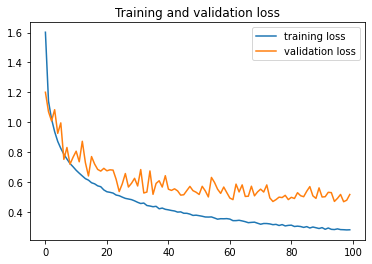

In [82]:
plt.plot  ( epochs, loss, label = 'training loss' )
plt.plot  ( epochs, val_loss, label = 'validation loss' )
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss'   )

<Figure size 432x288 with 0 Axes>

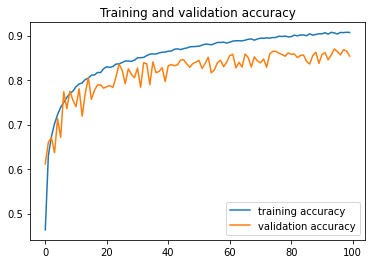

<Figure size 432x288 with 0 Axes>

In [83]:
plt.plot  ( epochs, accuracy, label = 'training accuracy' )
plt.plot  ( epochs, val_accuracy, label = 'validation accuracy' )
plt.title ('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

# **Observations:**
From the above plots we could see that our, 

- Loss has significantly reduced from 1.6 to 0.28 on Training and 1.2 to 0.51 on Validation set.

- Training accuracy is at 90% and Validation accuracy achieved is 85.0% which are close by and by which we could make a good working model.